# Project: Analysis of A* Search on Minneapolis City Map

### Name: Silas Kati

## Imports

In [19]:
!git clone https://github.com/aimacode/aima-python.git


Cloning into 'aima-python'...
remote: Enumerating objects: 5095, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5095 (delta 0), reused 1 (delta 0), pack-reused 5092
Receiving objects: 100% (5095/5095), 17.71 MiB | 140.00 KiB/s, done.
Resolving deltas: 100% (3416/3416), done.


In [21]:
%cd aima-python

/Users/moyanzhou/Desktop/d/aima-python/aima-python


In [2]:
!pip install -r requirements.txt
!git submodule init
!git submodule update

     |████████████████████████████████| 3.1 MB 925 kB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 375 kB/s eta 0:00:01     |████████████████████████▎       | 1.3 MB 375 kB/s eta 0:00:02
     |████████████████████████████████| 46.4 MB 531 kB/s eta 0:00:01    |█                               | 1.6 MB 144 kB/s eta 0:05:11     |█████████████████████████████▉  | 43.3 MB 196 kB/s eta 0:00:17
     |████████████████████████████████| 50 kB 177 kB/s eta 0:00:01
     |████████████████████████████████| 244.3 MB 2.4 kB/s eta 0:00:013  |█                               | 7.7 MB 77 kB/s eta 0:50:43     |█▍                              | 10.5 MB 248 kB/s eta 0:15:42     |███▏                            | 23.9 MB 121 kB/s eta 0:30:22     |██████▍                         | 49.0 MB 208 kB/s eta 0:15:36     |███████▋                        | 58.2 MB 320 kB/s eta 0:09:42     |████████▋                       | 66.1 MB 75 kB/s eta 0:39:31     |███████████████████▉            | 151.4 MB 125 kB

     |████████████████████████████████| 185 kB 140 kB/s eta 0:00:01
     |████████████████████████████████| 439 kB 206 kB/s eta 0:00:01
     |████████████████████████████████| 57 kB 549 kB/s eta 0:00:01
     |████████████████████████████████| 65 kB 590 kB/s eta 0:00:01
     |████████████████████████████████| 124 kB 459 kB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 215 kB/s eta 0:00:01    |████████████████▉               | 7.0 MB 113 kB/s eta 0:00:56     |████████████████████████        | 9.9 MB 218 kB/s eta 0:00:16     |█████████████████████████▎      | 10.5 MB 369 kB/s eta 0:00:08
     |████████████████████████████████| 6.0 MB 79 kB/s eta 0:00:011     |█████████████████▋              | 3.3 MB 154 kB/s eta 0:00:18     |███████████████████████████████▏| 5.8 MB 204 kB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 62 kB/s eta 0:00:016
     |████████████████████████████████| 3.5 MB 250 kB/s eta 0:00:01


     |████████████████████████████████| 781 kB 95 kB/s eta 0:00:012
     |████████████████████████████████| 151 kB 121 kB/s eta 0:00:01
     |████████████████████████████████| 42 kB 179 kB/s eta 0:00:01
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19496 sha256=2d1193ed8258e535999cee734354cf2db63db7838a2f807bb9b67169c7a11902
  Stored in directory: /Users/moyanzhou/Library/Caches/pip/wheels/14/4c/7c/d9b5c35a149d3bc8c72c7e92372913ff7dac9c6bd94bd1b8c9
Successfully built image
Submodule 'aima-data' (https://github.com/aimacode/aima-data.git) registered for path 'aima-data'
Cloning into '/Users/moyanzhou/Desktop/aima-python/aima-data'...
Submodule path 'aima-data': checked out 'f6cbea61ad0c21c6b7be826d17af5a8d3a7c2c86'


In [3]:
from search import *
from notebook import *
from utils import name, print_table
import statistics 
import pandas as pd
import numpy as np
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import time

In [23]:
%cd ../..

/Users/moyanzhou/Desktop


## Plotting the Minneapolis Map

In [24]:
def _show_map(graph_data, node_colors=None):
    G = nx.Graph(graph_data['graph_dict'])
    node_colors = node_colors or graph_data['node_colors']
    node_positions = graph_data['node_positions']
    node_label_pos = graph_data['node_label_positions']
    edge_weights = graph_data['edge_weights']

    # set the size of the plot
    plt.figure(figsize=(50, 80))
    # draw the graph (both nodes and edges) with locations from romania_locations
    nx.draw(G, pos={k: node_positions[k] for k in G.nodes()},
            node_color=[node_colors[node] for node in G.nodes()], linewidths=0.3, edgecolors='k')

    # draw labels for nodes
    node_label_handles = nx.draw_networkx_labels(G, pos=node_label_pos, font_size=14)

    # add a white bounding box behind the node labels
    [label.set_bbox(dict(facecolor='white', edgecolor='none')) for label in node_label_handles.values()]

    # add edge lables to the graph
    nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels=edge_weights, font_size=14)

    # add a legend
    white_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="white")
    orange_circle = lines.Line2D([], [], color="orange", marker='o', markersize=15, markerfacecolor="orange")
    red_circle = lines.Line2D([], [], color="red", marker='o', markersize=15, markerfacecolor="red")
    gray_circle = lines.Line2D([], [], color="gray", marker='o', markersize=15, markerfacecolor="gray")
    green_circle = lines.Line2D([], [], color="green", marker='o', markersize=15, markerfacecolor="green")
    plt.legend((white_circle, orange_circle, red_circle, gray_circle, green_circle),
               ('Un-explored', 'Frontier', 'Currently Exploring', 'Explored', 'Final Solution'),
               numpoints=1, prop={'size': 16}, loc=(.8, .75))

    # show the plot. No need to use in notebooks. nx.draw will show the graph itself.
    plt.show()

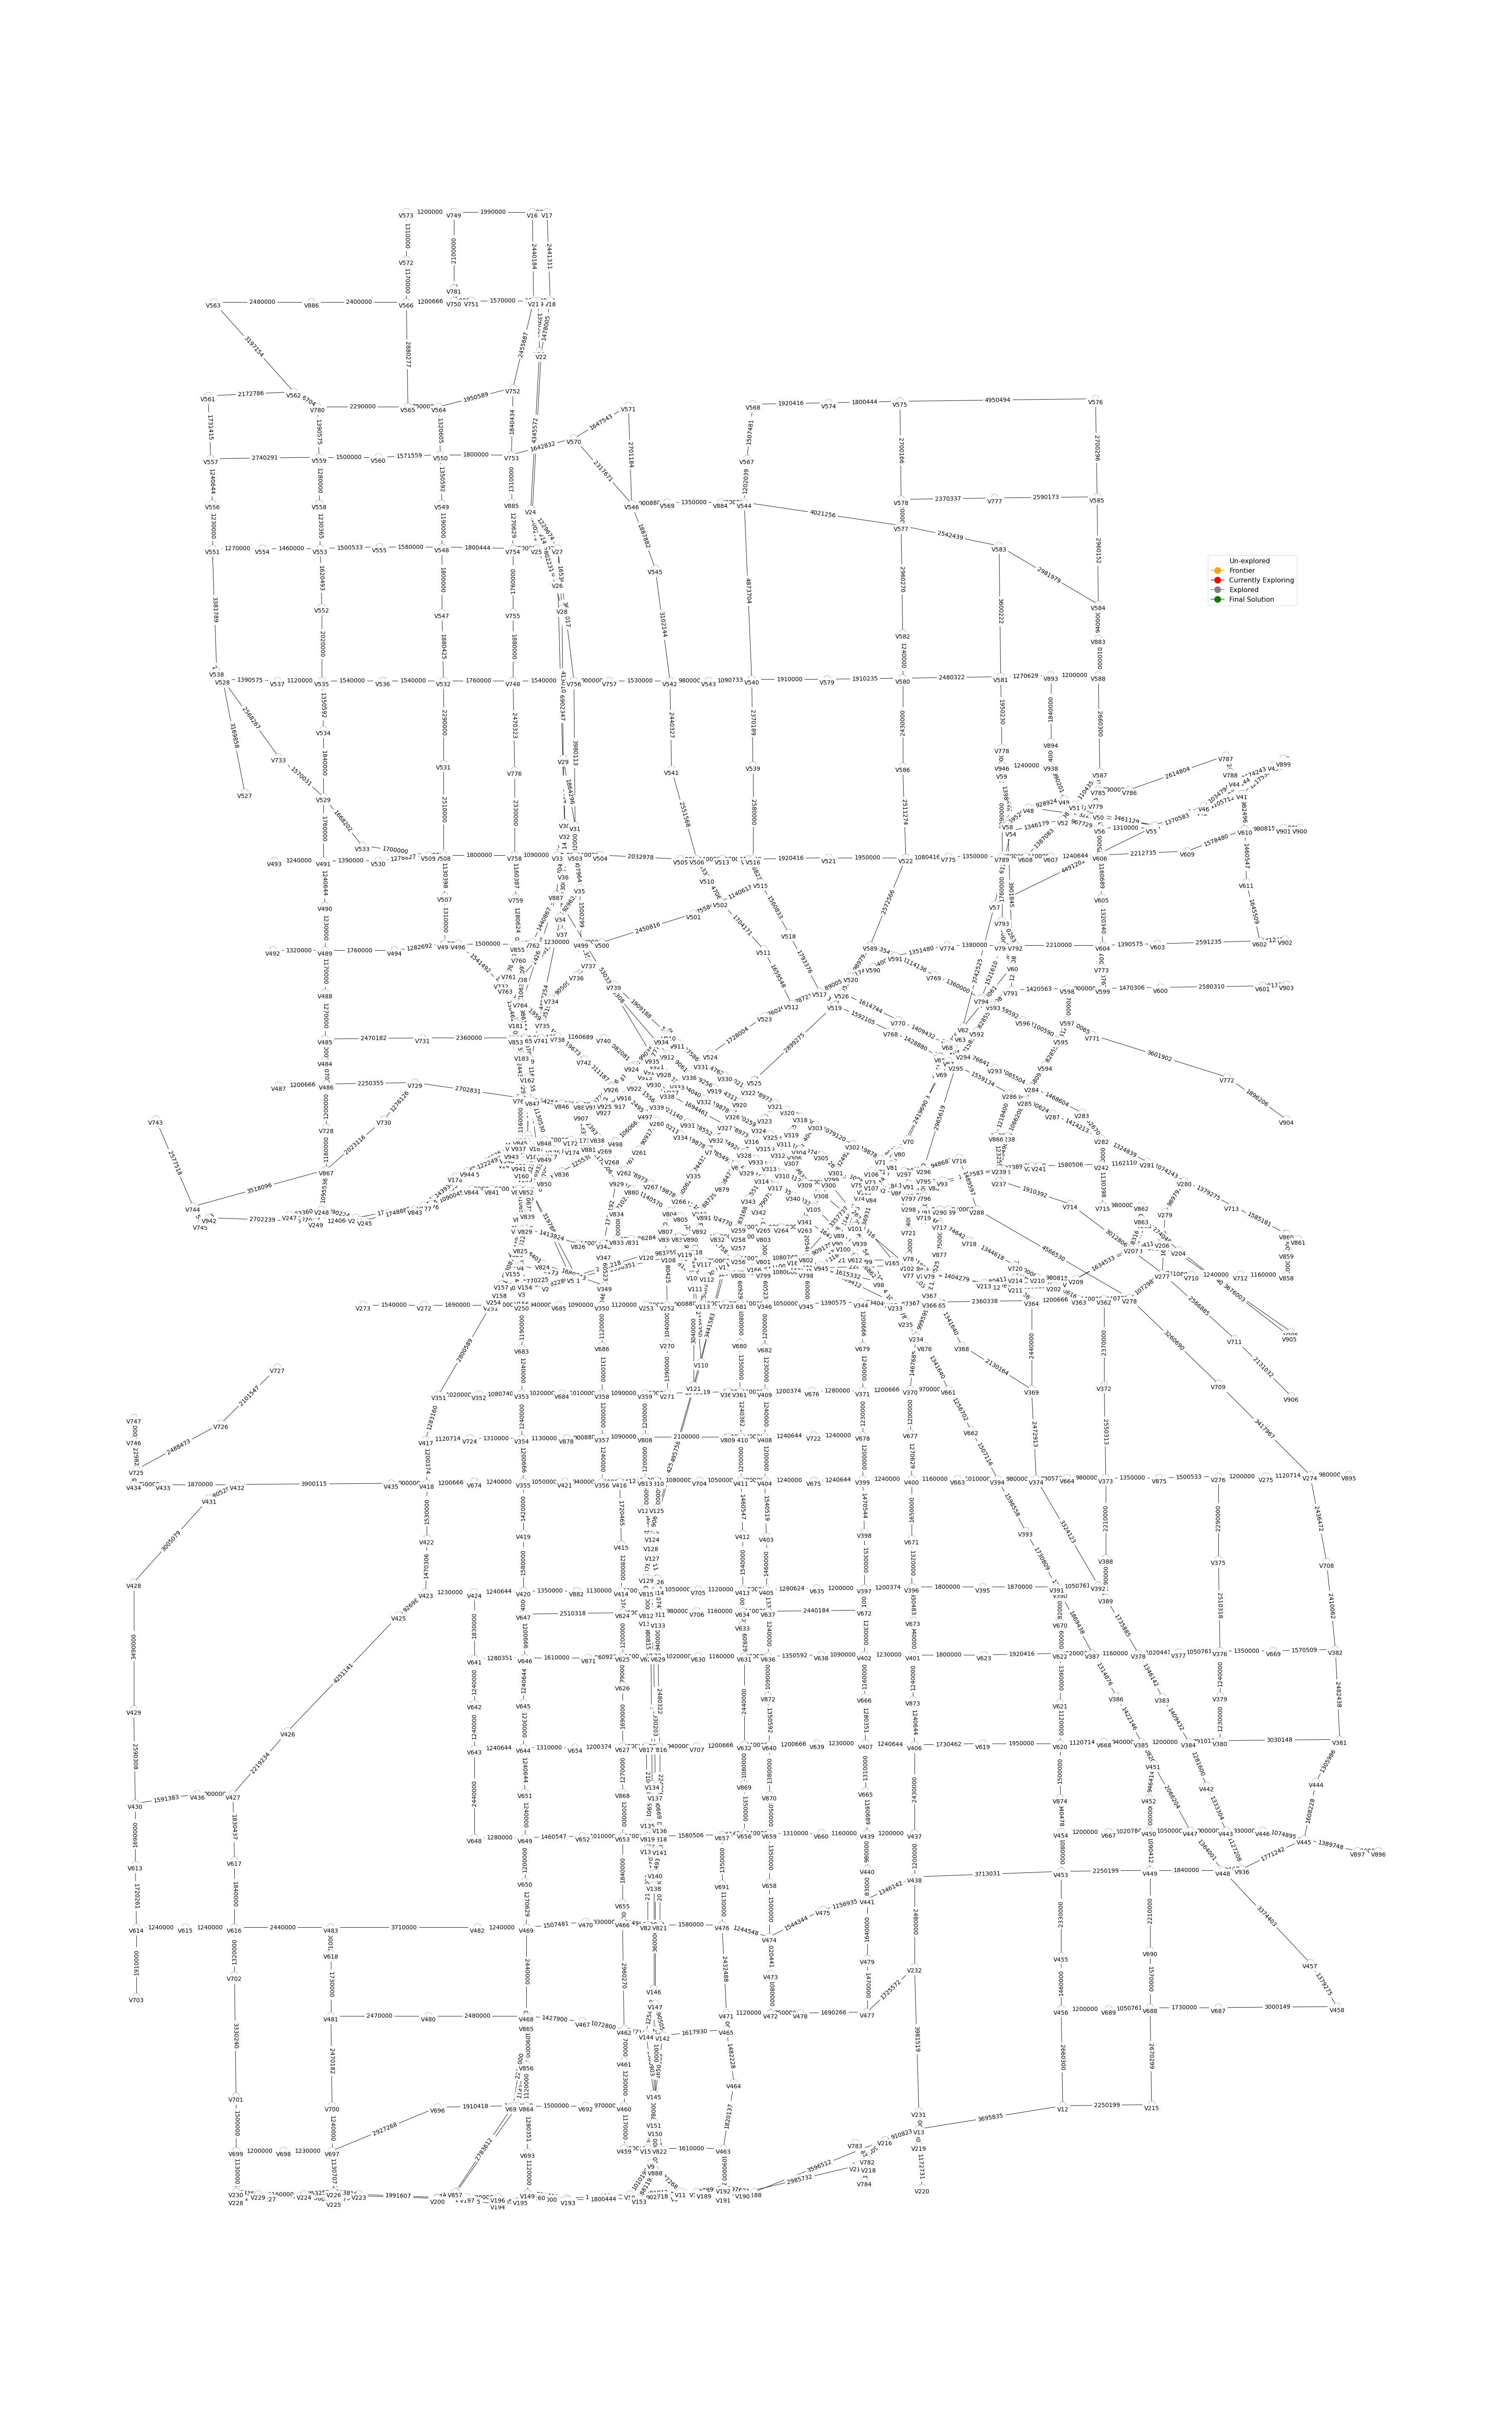

In [38]:
map_df = pd.read_csv("map.csv")
map_df['distance'] = np.sqrt( (map_df['start_x'] - map_df['end_x'])**2 + (map_df['start_y'] - map_df['end_y'])**2 )
map_df['distance'] = map_df['distance'] * 10000 # Make the distance noticable

# Clean out the non-moving edge
non_moving_lst = list()
for index, row in map_df.iterrows():
    if [row['start_x'], row['start_y']] == [row['end_x'], row['end_y']]:
        non_moving_lst.append(index)
for idx in non_moving_lst:
    map_df = map_df.drop(index=idx)

# Append every vertex a list
vertices_lst = list()
for index, row in map_df.iterrows():
    #vertices_lst.append((row['way']))
    vertices_lst.append((row['start_x'], row['start_y']))
    vertices_lst.append((row['end_x'], row['end_y']))
    
# Remove duplicates of vertices
vertices_lst_no_dup = []
[vertices_lst_no_dup.append(x) for x in vertices_lst if x not in vertices_lst_no_dup]

# Name each vectex and add them to the dictionary
vertices = dict()
for i in range(len(vertices_lst_no_dup)):
    vertices['V' + str(i+1)] = vertices_lst_no_dup[i]

minneapolis_map = UndirectedGraph(graph_dict=None)

# helper function
def get_key(val):
    for key, value in vertices.items():
         if val == value:
             return key

# connect edge between vertices
for index, row in map_df.iterrows():
    start = (row['start_x'], row['start_y'])
    end = (row['end_x'], row['end_y'])
    minneapolis_map.connect(get_key(start), get_key(end), int(row['distance']))

# Log their individual locations 
minneapolis_map.locations = vertices

# node colors, node positions and node label positions
node_colors = {node: 'white' for node in minneapolis_map.locations.keys()}
node_positions = minneapolis_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in minneapolis_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in minneapolis_map.graph_dict.items() for k2, v2 in v.items()}

minneapolis_graph_data = {   'graph_dict' : minneapolis_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                        'edge_weights': edge_weights
                    }
_show_map(minneapolis_graph_data)

# Limitation: don't know about which coordinate system they use, could be inaccurate.

In [28]:
map_df # Full map data

,way,start_x,start_y,end_x,end_y,distance
0,1,1121,7568,1042,7545,8.228001e+05
1,1,1042,7545,982,7530,6.184658e+05
2,2,982,7530,979,7601,7.106335e+05
3,1,1106,7568,979,7601,1.312174e+06
4,2,1522,7879,1455,7920,7.854935e+05
...,...,...,...,...,...,...
1352,1,1826,7710,1740,7601,1.388416e+06
1353,1,1837,7669,1740,7601,1.184610e+06
1354,2,2197,8966,2197,8977,1.100000e+05
1355,2,2197,9026,2197,8977,4.900000e+05


In [29]:
vertices # Coordinate of every vertex

{'V1': (1121.0, 7568.0),
 'V2': (1042.0, 7545.0),
 'V3': (982.0, 7530.0),
 'V4': (979.0, 7601.0),
 'V5': (1106.0, 7568.0),
 'V6': (1522.0, 7879.0),
 'V7': (1455.0, 7920.0),
 'V8': (1369.0, 5040.0),
 'V9': (1309.0, 5130.0),
 'V10': (1256.0, 5044.0),
 'V11': (1384.0, 5051.0),
 'V12': (2351.0, 5288.0),
 'V13': (1987.0, 5224.0),
 'V14': (937.0, 7883.0),
 'V15': (862.0, 7860.0),
 'V16': (1009.0, 10500.0),
 'V17': (1046.0, 10500.0),
 'V18': (1054.0, 10256.0),
 'V19': (1024.0, 10256.0),
 'V20': (1027.0, 10117.0),
 'V21': (1012.0, 10256.0),
 'V22': (1031.0, 10110.0),
 'V23': (1009.0, 9679.0),
 'V24': (1005.0, 9683.0),
 'V25': (1020.0, 9574.0),
 'V26': (1073.0, 9480.0),
 'V27': (1073.0, 9574.0),
 'V28': (1084.0, 9409.0),
 'V29': (1087.0, 8996.0),
 'V30': (1091.0, 8820.0),
 'V31': (1117.0, 8812.0),
 'V32': (1091.0, 8790.0),
 'V33': (1073.0, 8730.0),
 'V34': (1080.0, 8561.0),
 'V35': (1129.0, 8640.0),
 'V36': (1087.0, 8678.0),
 'V37': (1084.0, 8520.0),
 'V38': (982.0, 8396.0),
 'V39': (1001.0, 81

In [30]:
minneapolis_map.get("V1") # Info about connection between vertices

{'V2': 822800, 'V108': 2396351, 'V160': 3197889}

## Comparing successors, goal tests, states, and path cost

In [74]:
# override compare_searchers in the source code to print out path cost
def compare_searchers(problems, header,
                      searchers=[breadth_first_graph_search,
                                 depth_first_graph_search,
                                 uniform_cost_search,
                                 astar_search]):
    def do(searcher, problem):
        start_time = time.time()
        path_indx = 0
        p = InstrumentedProblem(problem)
        x = searcher(p)
        passed_time = time.time() - start_time 
        return p, x.path_cost, passed_time 

    table = [[name(s)] + [do(s, p) for p in problems] for s in searchers]

    print_table(table, header)
    print ("\t\t\t", end=" ")

    # (optionaly) Let's loop through the table and calculate some stats! 
    for i in range(len(problems)):

        mylist = []
        for j in range(len(searchers)):
                #solution = table[j+1][i+1][0]
                path_cost = table[j+1][i+1][1]
                mylist.append(path_cost)

        # compute statistics
       # print("\tmean: %.4f std: %.4f" %(mean(mylist), statistics.stdev(mylist)), end=" ")

    print("")

    return table 

In [80]:
df = pd.read_csv('map.csv')
way = df.way.to_list()
one = []
two = []
for index in way:
    if way[index]== 1:
        one.append(index+1)
    else:
        two.append(index+1)
print(len(one))
print(len(two))

def manhattan_distance(x, y):
    return sum(abs(_x - _y) for _x, _y in zip(x, y))

def chebyshev_distance(x, y):
    return max(abs(_x - _y) for _x, _y in zip(x, y))



class GraphProblem(Problem):
    """The problem of searching a graph from one node to another."""

    def __init__(self, initial, goal, graph):
        super().__init__(initial, goal)
        self.graph = graph

    def actions(self, A):
        """The actions at a graph node are just its neighbors."""
        return list(self.graph.get(A).keys())

    def result(self, state, action):
        """The result of going to a neighbor is just that neighbor."""
        return action

    def path_cost(self, cost_so_far, A, action, B):
        return cost_so_far + (self.graph.get(A, B) or np.inf)

    def find_min_edge(self):
        """Find minimum value of edges."""
        m = np.inf
        for d in self.graph.graph_dict.values():
            local_min = min(d.values())
            m = min(m, local_min)

        return m

    def h(self, node):
        """h function is straight-line distance from a node's state to goal."""
        locs = getattr(self.graph, 'locations', None)
        if locs:
            if type(node) is str:
                return int(distance(locs[node], locs[self.goal]))

            return int(distance(locs[node.state], locs[self.goal]))
        else:
            return np.inf
    
    def manhattan_h(self, node):
        """h function is l1 norm distance from a node's state to goal."""
        locs = getattr(self.graph, 'locations', None)
        if locs:
            if type(node) is str:
                return int(manhattan_distance(locs[node], locs[self.goal]))

            return int(manhattan_distance(locs[node.state], locs[self.goal]))
        else:
            return np.inf

    def chebyshev_h(self, node):
        """h function is l1 norm distance from a node's state to goal."""
        locs = getattr(self.graph, 'locations', None)
        if locs:
            if type(node) is str:
                return int(chebyshev_distance(locs[node], locs[self.goal]))

            return int(chebyshev_distance(locs[node.state], locs[self.goal]))
        else:
            return np.inf

def manhattan_astar_search(problem, h=None, display=False):
    """A* search is best-first graph search with f(n) = g(n)+h(n).
    You need to specify the h function when you call astar_search, or
    else in your Problem subclass."""
    h = memoize(problem.manhattan_h, 'h')
    return best_first_graph_search(problem, lambda n: n.path_cost + h(n), display)

def chebyshev_astar_search(problem, h=None, display=False):
    """A* search is best-first graph search with f(n) = g(n)+h(n).
    You need to specify the h function when you call astar_search, or
    else in your Problem subclass."""
    h = memoize(problem.chebyshev_h, 'h')
    return best_first_graph_search(problem, lambda n: n.path_cost + h(n), display)

def ways(node):
    index = int(str(node).split("V")[1].split('>')[0])
    if index in one:
#        print(str(index) + "0.9")
        return 0.9
    else:
#        print(str(index) + "1.1")
        return 1.1

def weighted_astar_search(problem, h=None, display=False):
    """A* search is best-first graph search with f(n) = g(n)+h(n).
    You need to specify the h function when you call astar_search, or
    else in your Problem subclass."""
    h = memoize(h or problem.h, 'h')
    #print(way(n))
    return best_first_graph_search(problem, lambda n: ways(n) * (n.path_cost + 2 * h(n)), display)

388
969


## Calculating for one vertex to all vertices

In [82]:
%%time
compare_searchers(problems=[GraphProblem('V1', 'V326', minneapolis_map),
                            GraphProblem('V72', 'V852', minneapolis_map),
                            GraphProblem('V579', 'V944', minneapolis_map)],
                  header=['Searcher', 'minneapolis_map(V1, V326)',
                          'minneapolis_map(V72, V852)',
                          'minneapolis_map(V579, V944)'],
                  searchers=[astar_search,
                                manhattan_astar_search,
                                chebyshev_astar_search,
                                weighted_astar_search])

Searcher                 minneapolis_map(V1, V326)                                minneapolis_map(V72, V852)                                minneapolis_map(V579, V944)                            
astar_search             (< 194/ 195/ 580/V326>, 8294046, 0.012200117111206055)   (< 393/ 394/1187/V852>, 11463314, 0.03241610527038574)    (< 487/ 488/1418/V944>, 21318334, 0.028969287872314453)
manhattan_astar_search   (< 194/ 195/ 580/V326>, 8294046, 0.011770963668823242)   (< 393/ 394/1187/V852>, 11463314, 0.024673938751220703)   (< 487/ 488/1418/V944>, 21318334, 0.02685999870300293) 
chebyshev_astar_search   (< 194/ 195/ 580/V326>, 8294046, 0.010650157928466797)   (< 393/ 394/1187/V852>, 11463314, 0.02143096923828125)    (< 487/ 488/1418/V944>, 21318334, 0.025503158569335938)
weighted_astar_search    (< 194/ 195/ 580/V326>, 8294046, 0.012422323226928711)   (< 393/ 394/1187/V852>, 11463314, 0.025840044021606445)   (< 487/ 488/1418/V944>, 21318334, 0.02936077117919922) 
			 
CPU times: user

[['Searcher',
  'minneapolis_map(V1, V326)',
  'minneapolis_map(V72, V852)',
  'minneapolis_map(V579, V944)'],
 ['astar_search',
  (< 194/ 195/ 580/V326>, 8294046, 0.012200117111206055),
  (< 393/ 394/1187/V852>, 11463314, 0.03241610527038574),
  (< 487/ 488/1418/V944>, 21318334, 0.028969287872314453)],
 ['manhattan_astar_search',
  (< 194/ 195/ 580/V326>, 8294046, 0.011770963668823242),
  (< 393/ 394/1187/V852>, 11463314, 0.024673938751220703),
  (< 487/ 488/1418/V944>, 21318334, 0.02685999870300293)],
 ['chebyshev_astar_search',
  (< 194/ 195/ 580/V326>, 8294046, 0.010650157928466797),
  (< 393/ 394/1187/V852>, 11463314, 0.02143096923828125),
  (< 487/ 488/1418/V944>, 21318334, 0.025503158569335938)],
 ['weighted_astar_search',
  (< 194/ 195/ 580/V326>, 8294046, 0.012422323226928711),
  (< 393/ 394/1187/V852>, 11463314, 0.025840044021606445),
  (< 487/ 488/1418/V944>, 21318334, 0.02936077117919922)]]

In [83]:
as_cost = 0
mas_cost = 0
cas_cost = 0
was_cost = 0

as_time = 0
mas_time = 0
cas_time = 0
was_time = 0

as_succs = 0
mas_succs = 0
cas_succs = 0
was_succs = 0

as_goal_tests = 0
mas_goal_tests = 0
cas_goal_tests = 0
was_goal_tests = 0

as_states = 0
mas_states = 0
cas_states = 0
was_states = 0


for i in range(len(vertices)):  
    vertex1 = "V" 
    vertex1 += str(i+1)
#   for j in range(91):
#     vertex2 = "V"
#     vertex2 += str(j+1)

    t = compare_searchers(problems=[GraphProblem('V1', vertex1, minneapolis_map)],
                        header=['Searcher', 'minneapolis_map(' + 'V1' + ', ' + vertex1 + ')'],
                        searchers=[ astar_search,
                                    manhattan_astar_search,
                                    chebyshev_astar_search,
                                    weighted_astar_search])

    a = t[1]
    (z, costt, timee) = a[1]
    as_cost += costt 
    as_time += timee 
    as_succs += z.succs
    as_goal_tests += z.goal_tests
    as_states += z.states

    mas = t[2]
    (z, costt, timee) = mas[1]
    mas_cost += costt 
    mas_time += timee 
    mas_succs += z.succs
    mas_goal_tests += z.goal_tests
    mas_states += z.states

    cas = t[3]
    (z, costt, timee) = cas[1]
    cas_cost += costt 
    cas_time += timee 
    cas_succs += z.succs 
    cas_goal_tests += z.goal_tests
    cas_states += z.states 

    was = t[4]
    (z, costt, timee) = was[1]
    was_cost += costt 
    was_time += timee 
    was_succs += z.succs
    was_goal_tests += z.goal_tests
    was_states += z.states


print('as_cost: ' + str(as_cost))
print('as_time: ' + str(as_time))
print('as_succs: ' + str(as_succs))
print('as_goal_tests: ' + str(as_goal_tests))
print('as_states: ' + str(as_states))

print('mas_cost: ' + str(mas_cost))
print('mas_time: ' + str(mas_time))
print('mas_succs: ' + str(mas_succs))
print('mas_goal_tests: ' + str(mas_goal_tests))
print('mas_states: ' + str(mas_states))

print('cas_cost: ' + str(cas_cost))
print('cas_time: ' + str(cas_time))
print('cas_succs: ' + str(cas_succs))
print('cas_goal_tests: ' + str(cas_goal_tests))
print('cas_states: ' + str(cas_states))

print('was_cost: ' + str(was_cost))
print('was_time: ' + str(was_time))
print('was_succs: ' + str(was_succs))
print('was_goal_tests: ' + str(was_goal_tests))
print('was_states: ' + str(was_states))

Searcher                 minneapolis_map(V1, V1)                         
astar_search             (<   0/   1/   0/V1>, 0, 0.00012302398681640625)
manhattan_astar_search   (<   0/   1/   0/V1>, 0, 3.409385681152344e-05) 
chebyshev_astar_search   (<   0/   1/   0/V1>, 0, 2.4080276489257812e-05)
weighted_astar_search    (<   0/   1/   0/V1>, 0, 4.601478576660156e-05) 
			 
Searcher                 minneapolis_map(V1, V2)                              
astar_search             (<   1/   2/   3/V2>, 822800, 0.00015997886657714844)
manhattan_astar_search   (<   1/   2/   3/V2>, 822800, 5.1975250244140625e-05)
chebyshev_astar_search   (<   1/   2/   3/V2>, 822800, 4.315376281738281e-05) 
weighted_astar_search    (<   1/   2/   3/V2>, 822800, 6.890296936035156e-05) 
			 
Searcher                 minneapolis_map(V1, V3)                               
astar_search             (<   3/   4/   9/V3>, 1441265, 0.00023698806762695312)
manhattan_astar_search   (<   3/   4/   9/V3>, 1441265, 9.0122222

Searcher                 minneapolis_map(V1, V22)                              
astar_search             (< 840/ 841/2435/V22>, 26473852, 0.05472278594970703) 
manhattan_astar_search   (< 840/ 841/2435/V22>, 26473852, 0.054991722106933594)
chebyshev_astar_search   (< 840/ 841/2435/V22>, 26473852, 0.05072498321533203) 
weighted_astar_search    (< 840/ 841/2435/V22>, 26473852, 0.061161041259765625)
			 
Searcher                 minneapolis_map(V1, V23)                              
astar_search             (< 722/ 723/2114/V23>, 22158241, 0.045198678970336914)
manhattan_astar_search   (< 722/ 723/2114/V23>, 22158241, 0.04574084281921387) 
chebyshev_astar_search   (< 722/ 723/2114/V23>, 22158241, 0.04643988609313965) 
weighted_astar_search    (< 722/ 723/2114/V23>, 22158241, 0.047348976135253906)
			 
Searcher                 minneapolis_map(V1, V24)                              
astar_search             (< 711/ 712/2085/V24>, 21766633, 0.04162001609802246) 
manhattan_astar_search   (< 71

Searcher                 minneapolis_map(V1, V43)                              
astar_search             (< 810/ 811/2355/V43>, 25435812, 0.05158400535583496) 
manhattan_astar_search   (< 810/ 811/2355/V43>, 25435812, 0.04899787902832031) 
chebyshev_astar_search   (< 810/ 811/2355/V43>, 25435812, 0.04830002784729004) 
weighted_astar_search    (< 810/ 811/2355/V43>, 25435812, 0.056523799896240234)
			 
Searcher                 minneapolis_map(V1, V44)                             
astar_search             (< 788/ 789/2293/V44>, 24637324, 0.04836606979370117)
manhattan_astar_search   (< 788/ 789/2293/V44>, 24637324, 0.04451107978820801)
chebyshev_astar_search   (< 788/ 789/2293/V44>, 24637324, 0.04527616500854492)
weighted_astar_search    (< 788/ 789/2293/V44>, 24637324, 0.05214524269104004)
			 
Searcher                 minneapolis_map(V1, V45)                              
astar_search             (< 816/ 817/2369/V45>, 25711567, 0.04987788200378418) 
manhattan_astar_search   (< 816/ 81

Searcher                 minneapolis_map(V1, V65)                              
astar_search             (< 436/ 437/1309/V65>, 12919069, 0.02905893325805664) 
manhattan_astar_search   (< 436/ 437/1309/V65>, 12919069, 0.027606964111328125)
chebyshev_astar_search   (< 436/ 437/1309/V65>, 12919069, 0.027287006378173828)
weighted_astar_search    (< 436/ 437/1309/V65>, 12919069, 0.032897233963012695)
			 
Searcher                 minneapolis_map(V1, V66)                              
astar_search             (< 441/ 442/1324/V66>, 13051374, 0.03178811073303223) 
manhattan_astar_search   (< 441/ 442/1324/V66>, 13051374, 0.029842853546142578)
chebyshev_astar_search   (< 441/ 442/1324/V66>, 13051374, 0.02592015266418457) 
weighted_astar_search    (< 441/ 442/1324/V66>, 13051374, 0.03463411331176758) 
			 
Searcher                 minneapolis_map(V1, V67)                              
astar_search             (< 429/ 430/1284/V67>, 12805407, 0.026937007904052734)
manhattan_astar_search   (< 42

Searcher                 minneapolis_map(V1, V86)                             
astar_search             (< 271/ 272/ 812/V86>, 9387017, 0.01566600799560547) 
manhattan_astar_search   (< 271/ 272/ 812/V86>, 9387017, 0.014899015426635742)
chebyshev_astar_search   (< 271/ 272/ 812/V86>, 9387017, 0.014091968536376953)
weighted_astar_search    (< 271/ 272/ 812/V86>, 9387017, 0.018085241317749023)
			 
Searcher                 minneapolis_map(V1, V87)                             
astar_search             (< 331/ 332/ 994/V87>, 10516583, 0.02396106719970703)
manhattan_astar_search   (< 331/ 332/ 994/V87>, 10516583, 0.02105712890625)   
chebyshev_astar_search   (< 331/ 332/ 994/V87>, 10516583, 0.02024388313293457)
weighted_astar_search    (< 331/ 332/ 994/V87>, 10516583, 0.02765178680419922)
			 
Searcher                 minneapolis_map(V1, V88)                              
astar_search             (< 318/ 319/ 955/V88>, 10337385, 0.021037817001342773)
manhattan_astar_search   (< 318/ 319/ 95

Searcher                 minneapolis_map(V1, V107)                              
astar_search             (< 310/ 311/ 932/V107>, 10141083, 0.02061009407043457) 
manhattan_astar_search   (< 310/ 311/ 932/V107>, 10141083, 0.019893169403076172)
chebyshev_astar_search   (< 310/ 311/ 932/V107>, 10141083, 0.01898980140686035) 
weighted_astar_search    (< 310/ 311/ 932/V107>, 10141083, 0.021464824676513672)
			 
Searcher                 minneapolis_map(V1, V108)                               
astar_search             (<  11/  12/  34/V108>, 2396351, 0.00032210350036621094)
manhattan_astar_search   (<  11/  12/  34/V108>, 2396351, 0.00027108192443847656)
chebyshev_astar_search   (<  11/  12/  34/V108>, 2396351, 0.0004050731658935547) 
weighted_astar_search    (<  11/  12/  34/V108>, 2396351, 0.0005388259887695312) 
			 
Searcher                 minneapolis_map(V1, V109)                              
astar_search             (<  20/  21/  61/V109>, 3194473, 0.0009877681732177734)
manhattan_ast

Searcher                 minneapolis_map(V1, V129)                              
astar_search             (< 383/ 384/1143/V129>, 11671910, 0.024057865142822266)
manhattan_astar_search   (< 383/ 384/1143/V129>, 11671910, 0.02412700653076172) 
chebyshev_astar_search   (< 384/ 385/1145/V129>, 11671910, 0.025634765625)      
weighted_astar_search    (< 383/ 384/1143/V129>, 11671910, 0.029489994049072266)
			 
Searcher                 minneapolis_map(V1, V130)                              
astar_search             (< 465/ 466/1396/V130>, 13793674, 0.03230404853820801) 
manhattan_astar_search   (< 465/ 466/1396/V130>, 13793674, 0.027680158615112305)
chebyshev_astar_search   (< 465/ 466/1396/V130>, 13793674, 0.029371023178100586)
weighted_astar_search    (< 465/ 466/1396/V130>, 13793674, 0.0346980094909668)  
			 
Searcher                 minneapolis_map(V1, V131)                              
astar_search             (< 433/ 434/1299/V131>, 12861910, 0.027798891067504883)
manhattan_astar_se

Searcher                 minneapolis_map(V1, V150)                              
astar_search             (< 856/ 857/2477/V150>, 27162431, 0.05490565299987793) 
manhattan_astar_search   (< 856/ 857/2477/V150>, 27162431, 0.049611806869506836)
chebyshev_astar_search   (< 856/ 857/2477/V150>, 27162431, 0.04861164093017578) 
weighted_astar_search    (< 856/ 857/2477/V150>, 27162431, 0.05454397201538086) 
			 
Searcher                 minneapolis_map(V1, V151)                              
astar_search             (< 844/ 845/2445/V151>, 26654087, 0.05106997489929199) 
manhattan_astar_search   (< 844/ 845/2445/V151>, 26654087, 0.046060800552368164)
chebyshev_astar_search   (< 844/ 845/2445/V151>, 26654087, 0.046813011169433594)
weighted_astar_search    (< 844/ 845/2445/V151>, 26654087, 0.058055877685546875)
			 
Searcher                 minneapolis_map(V1, V152)                              
astar_search             (< 864/ 865/2499/V152>, 27389546, 0.058290958404541016)
manhattan_astar_se

Searcher                 minneapolis_map(V1, V172)                             
astar_search             (< 105/ 106/ 311/V172>, 6403794, 0.004369020462036133)
manhattan_astar_search   (< 105/ 106/ 311/V172>, 6403794, 0.004443168640136719)
chebyshev_astar_search   (< 105/ 106/ 311/V172>, 6403794, 0.004470109939575195)
weighted_astar_search    (< 105/ 106/ 311/V172>, 6403794, 0.00554966926574707) 
			 
Searcher                 minneapolis_map(V1, V173)                              
astar_search             (< 133/ 134/ 389/V173>, 6940915, 0.00566411018371582)  
manhattan_astar_search   (< 133/ 134/ 389/V173>, 6940915, 0.0056591033935546875)
chebyshev_astar_search   (< 133/ 134/ 389/V173>, 6940915, 0.0065920352935791016)
weighted_astar_search    (< 133/ 134/ 389/V173>, 6940915, 0.009063005447387695) 
			 
Searcher                 minneapolis_map(V1, V174)                              
astar_search             (<  90/  91/ 263/V174>, 6024495, 0.006314992904663086) 
manhattan_astar_search 

Searcher                 minneapolis_map(V1, V193)                             
astar_search             (< 922/ 923/2655/V193>, 30934067, 0.05455493927001953)
manhattan_astar_search   (< 922/ 923/2655/V193>, 30934067, 0.05305767059326172)
chebyshev_astar_search   (< 922/ 923/2655/V193>, 30934067, 0.0496368408203125) 
weighted_astar_search    (< 922/ 923/2655/V193>, 30934067, 0.06303691864013672)
			 
Searcher                 minneapolis_map(V1, V194)                              
astar_search             (< 939/ 940/2695/V194>, 32714584, 0.05843806266784668) 
manhattan_astar_search   (< 939/ 940/2695/V194>, 32714584, 0.053941965103149414)
chebyshev_astar_search   (< 939/ 940/2695/V194>, 32714584, 0.058435916900634766)
weighted_astar_search    (< 939/ 940/2695/V194>, 32714584, 0.07401013374328613) 
			 
Searcher                 minneapolis_map(V1, V195)                              
astar_search             (< 934/ 935/2684/V195>, 32134067, 0.07013583183288574) 
manhattan_astar_search 

Searcher                 minneapolis_map(V1, V215)                             
astar_search             (< 935/ 936/2686/V215>, 32177486, 0.05214095115661621)
manhattan_astar_search   (< 935/ 936/2686/V215>, 32177486, 0.04970502853393555)
chebyshev_astar_search   (< 935/ 936/2686/V215>, 32177486, 0.04794001579284668)
weighted_astar_search    (< 935/ 936/2686/V215>, 32177486, 0.0579988956451416) 
			 
Searcher                 minneapolis_map(V1, V216)                             
astar_search             (< 936/ 937/2688/V216>, 32311452, 0.05092191696166992)
manhattan_astar_search   (< 936/ 937/2688/V216>, 32311452, 0.04872393608093262)
chebyshev_astar_search   (< 936/ 937/2688/V216>, 32311452, 0.0472412109375)    
weighted_astar_search    (< 936/ 937/2688/V216>, 32311452, 0.05797290802001953)
			 
Searcher                 minneapolis_map(V1, V217)                              
astar_search             (< 941/ 942/2698/V217>, 33315543, 0.05130290985107422) 
manhattan_astar_search   (< 

Searcher                 minneapolis_map(V1, V237)                              
astar_search             (< 411/ 412/1231/V237>, 12501852, 0.023553133010864258)
manhattan_astar_search   (< 411/ 412/1231/V237>, 12501852, 0.02441692352294922) 
chebyshev_astar_search   (< 411/ 412/1231/V237>, 12501852, 0.02275705337524414) 
weighted_astar_search    (< 411/ 412/1231/V237>, 12501852, 0.03081989288330078) 
			 
Searcher                 minneapolis_map(V1, V238)                              
astar_search             (< 463/ 464/1391/V238>, 13736503, 0.028313875198364258)
manhattan_astar_search   (< 463/ 464/1391/V238>, 13736503, 0.03137707710266113) 
chebyshev_astar_search   (< 463/ 464/1391/V238>, 13736503, 0.027164220809936523)
weighted_astar_search    (< 463/ 464/1391/V238>, 13736503, 0.03470492362976074) 
			 
Searcher                 minneapolis_map(V1, V239)                             
astar_search             (< 430/ 431/1288/V239>, 12810005, 0.02762913703918457)
manhattan_astar_sear

Searcher                 minneapolis_map(V1, V262)                              
astar_search             (< 140/ 141/ 408/V262>, 7128923, 0.007605075836181641) 
manhattan_astar_search   (< 140/ 141/ 408/V262>, 7128923, 0.006544828414916992) 
chebyshev_astar_search   (< 140/ 141/ 408/V262>, 7128923, 0.0062258243560791016)
weighted_astar_search    (< 140/ 141/ 408/V262>, 7128923, 0.007843017578125)    
			 
Searcher                 minneapolis_map(V1, V263)                             
astar_search             (< 147/ 148/ 434/V263>, 7354901, 0.0074310302734375)  
manhattan_astar_search   (< 147/ 148/ 434/V263>, 7354901, 0.006891012191772461)
chebyshev_astar_search   (< 147/ 148/ 434/V263>, 7354901, 0.00685882568359375) 
weighted_astar_search    (< 147/ 148/ 434/V263>, 7354901, 0.008699178695678711)
			 
Searcher                 minneapolis_map(V1, V264)                             
astar_search             (< 124/ 125/ 364/V264>, 6754901, 0.005761623382568359)
manhattan_astar_search   

Searcher                 minneapolis_map(V1, V283)                              
astar_search             (< 549/ 550/1628/V283>, 16211670, 0.03147077560424805) 
manhattan_astar_search   (< 549/ 550/1628/V283>, 16211670, 0.030496835708618164)
chebyshev_astar_search   (< 549/ 550/1628/V283>, 16211670, 0.030803918838500977)
weighted_astar_search    (< 549/ 550/1628/V283>, 16211670, 0.03627586364746094) 
			 
Searcher                 minneapolis_map(V1, V284)                              
astar_search             (< 512/ 513/1528/V284>, 15223186, 0.032036781311035156)
manhattan_astar_search   (< 512/ 513/1528/V284>, 15223186, 0.028474807739257812)
chebyshev_astar_search   (< 512/ 513/1528/V284>, 15223186, 0.028434038162231445)
weighted_astar_search    (< 512/ 513/1528/V284>, 15223186, 0.03407001495361328) 
			 
Searcher                 minneapolis_map(V1, V285)                             
astar_search             (< 502/ 503/1499/V285>, 14802711, 0.0297548770904541) 
manhattan_astar_sear

Searcher                 minneapolis_map(V1, V308)                             
astar_search             (< 201/ 202/ 602/V308>, 8405802, 0.011542081832885742)
manhattan_astar_search   (< 201/ 202/ 602/V308>, 8405802, 0.010155200958251953)
chebyshev_astar_search   (< 201/ 202/ 602/V308>, 8405802, 0.009642839431762695)
weighted_astar_search    (< 201/ 202/ 602/V308>, 8405802, 0.012996912002563477)
			 
Searcher                 minneapolis_map(V1, V309)                             
astar_search             (< 241/ 242/ 727/V309>, 9022117, 0.01357889175415039) 
manhattan_astar_search   (< 241/ 242/ 727/V309>, 9022117, 0.013318061828613281)
chebyshev_astar_search   (< 241/ 242/ 727/V309>, 9022117, 0.01352691650390625) 
weighted_astar_search    (< 241/ 242/ 727/V309>, 9022117, 0.016367673873901367)
			 
Searcher                 minneapolis_map(V1, V310)                             
astar_search             (< 176/ 177/ 523/V310>, 7921993, 0.009027242660522461)
manhattan_astar_search   (< 17

Searcher                 minneapolis_map(V1, V332)                             
astar_search             (< 247/ 248/ 743/V332>, 9113924, 0.012794017791748047)
manhattan_astar_search   (< 247/ 248/ 743/V332>, 9113924, 0.011992931365966797)
chebyshev_astar_search   (< 247/ 248/ 743/V332>, 9113924, 0.014044046401977539)
weighted_astar_search    (< 247/ 248/ 743/V332>, 9113924, 0.01813483238220215) 
			 
Searcher                 minneapolis_map(V1, V333)                             
astar_search             (< 237/ 238/ 712/V333>, 8942053, 0.014574050903320312)
manhattan_astar_search   (< 237/ 238/ 712/V333>, 8942053, 0.012493133544921875)
chebyshev_astar_search   (< 237/ 238/ 712/V333>, 8942053, 0.01286005973815918) 
weighted_astar_search    (< 237/ 238/ 712/V333>, 8942053, 0.018558979034423828)
			 
Searcher                 minneapolis_map(V1, V334)                             
astar_search             (< 182/ 183/ 540/V334>, 7964364, 0.011047840118408203)
manhattan_astar_search   (< 18

Searcher                 minneapolis_map(V1, V356)                             
astar_search             (< 220/ 221/ 662/V356>, 8681931, 0.012296915054321289)
manhattan_astar_search   (< 220/ 221/ 662/V356>, 8681931, 0.011240959167480469)
chebyshev_astar_search   (< 220/ 221/ 662/V356>, 8681931, 0.011332988739013672)
weighted_astar_search    (< 220/ 221/ 662/V356>, 8681931, 0.01459813117980957) 
			 
Searcher                 minneapolis_map(V1, V357)                              
astar_search             (< 150/ 151/ 442/V357>, 7481265, 0.007169961929321289) 
manhattan_astar_search   (< 150/ 151/ 442/V357>, 7481265, 0.0072193145751953125)
chebyshev_astar_search   (< 150/ 151/ 442/V357>, 7481265, 0.006685972213745117) 
weighted_astar_search    (< 150/ 151/ 442/V357>, 7481265, 0.01017904281616211)  
			 
Searcher                 minneapolis_map(V1, V358)                              
astar_search             (<  95/  96/ 280/V358>, 6281265, 0.004591226577758789) 
manhattan_astar_search 

Searcher                 minneapolis_map(V1, V378)                             
astar_search             (< 667/ 668/1948/V378>, 20445208, 0.03824877738952637)
manhattan_astar_search   (< 667/ 668/1948/V378>, 20445208, 0.03722691535949707)
chebyshev_astar_search   (< 667/ 668/1948/V378>, 20445208, 0.03929591178894043)
weighted_astar_search    (< 667/ 668/1948/V378>, 20445208, 0.04840397834777832)
			 
Searcher                 minneapolis_map(V1, V379)                              
astar_search             (< 764/ 765/2219/V379>, 23756410, 0.045815229415893555)
manhattan_astar_search   (< 764/ 765/2219/V379>, 23756410, 0.0425572395324707)  
chebyshev_astar_search   (< 764/ 765/2219/V379>, 23756410, 0.04102301597595215) 
weighted_astar_search    (< 764/ 765/2219/V379>, 23756410, 0.05109214782714844) 
			 
Searcher                 minneapolis_map(V1, V380)                              
astar_search             (< 775/ 776/2253/V380>, 23991794, 0.0456089973449707)  
manhattan_astar_search 

Searcher                 minneapolis_map(V1, V400)                              
astar_search             (< 458/ 459/1376/V400>, 13507983, 0.030633926391601562)
manhattan_astar_search   (< 458/ 459/1376/V400>, 13507983, 0.03022909164428711) 
chebyshev_astar_search   (< 458/ 459/1376/V400>, 13507983, 0.02984929084777832) 
weighted_astar_search    (< 458/ 459/1376/V400>, 13507983, 0.0366208553314209)  
			 
Searcher                 minneapolis_map(V1, V401)                              
astar_search             (< 611/ 612/1799/V401>, 18348466, 0.040843963623046875)
manhattan_astar_search   (< 611/ 612/1799/V401>, 18348466, 0.03395199775695801) 
chebyshev_astar_search   (< 611/ 612/1799/V401>, 18348466, 0.03218197822570801) 
weighted_astar_search    (< 611/ 612/1799/V401>, 18348466, 0.04018807411193848) 
			 
Searcher                 minneapolis_map(V1, V402)                              
astar_search             (< 627/ 628/1846/V402>, 19025427, 0.038555145263671875)
manhattan_astar_se

Searcher                 minneapolis_map(V1, V423)                              
astar_search             (< 340/ 341/1020/V423>, 10717787, 0.0286710262298584)  
manhattan_astar_search   (< 340/ 341/1020/V423>, 10717787, 0.029577970504760742)
chebyshev_astar_search   (< 340/ 341/1020/V423>, 10717787, 0.026896953582763672)
weighted_astar_search    (< 340/ 341/1020/V423>, 10717787, 0.061663150787353516)
			 
Searcher                 minneapolis_map(V1, V424)                              
astar_search             (< 352/ 353/1051/V424>, 10932575, 0.032788991928100586)
manhattan_astar_search   (< 352/ 353/1051/V424>, 10932575, 0.036125898361206055)
chebyshev_astar_search   (< 352/ 353/1051/V424>, 10932575, 0.03077983856201172) 
weighted_astar_search    (< 352/ 353/1051/V424>, 10932575, 0.21694087982177734) 
			 
Searcher                 minneapolis_map(V1, V425)                             
astar_search             (< 381/ 382/1139/V425>, 11644771, 0.08666276931762695)
manhattan_astar_sear

Searcher                 minneapolis_map(V1, V444)                              
astar_search             (< 878/ 879/2537/V444>, 28327928, 0.058670997619628906)
manhattan_astar_search   (< 878/ 879/2537/V444>, 28327928, 0.05494117736816406) 
chebyshev_astar_search   (< 878/ 879/2537/V444>, 28327928, 0.060739755630493164)
weighted_astar_search    (< 878/ 879/2537/V444>, 28327928, 0.06412792205810547) 
			 
Searcher                 minneapolis_map(V1, V445)                              
astar_search             (< 870/ 871/2514/V445>, 27761460, 0.06964302062988281) 
manhattan_astar_search   (< 870/ 871/2514/V445>, 27761460, 0.049636125564575195)
chebyshev_astar_search   (< 870/ 871/2514/V445>, 27761460, 0.046196937561035156)
weighted_astar_search    (< 870/ 871/2514/V445>, 27761460, 0.05801200866699219) 
			 
Searcher                 minneapolis_map(V1, V446)                              
astar_search             (< 846/ 847/2450/V446>, 26686565, 0.055580854415893555)
manhattan_astar_se

Searcher                 minneapolis_map(V1, V466)                              
astar_search             (< 694/ 695/2028/V466>, 21243145, 0.0427248477935791)  
manhattan_astar_search   (< 694/ 695/2028/V466>, 21243145, 0.042402029037475586)
chebyshev_astar_search   (< 694/ 695/2028/V466>, 21243145, 0.04264497756958008) 
weighted_astar_search    (< 694/ 695/2028/V466>, 21243145, 0.050995826721191406)
			 
Searcher                 minneapolis_map(V1, V467)                              
astar_search             (< 736/ 737/2149/V467>, 22822414, 0.053427934646606445)
manhattan_astar_search   (< 736/ 737/2149/V467>, 22822414, 0.04632401466369629) 
chebyshev_astar_search   (< 736/ 737/2149/V467>, 22822414, 0.03950905799865723) 
weighted_astar_search    (< 736/ 737/2149/V467>, 22822414, 0.06099295616149902) 
			 
Searcher                 minneapolis_map(V1, V468)                              
astar_search             (< 696/ 697/2036/V468>, 21394514, 0.04095172882080078) 
manhattan_astar_se

Searcher                 minneapolis_map(V1, V488)                              
astar_search             (< 440/ 441/1322/V488>, 13032412, 0.02615189552307129) 
manhattan_astar_search   (< 440/ 441/1322/V488>, 13032412, 0.024281024932861328)
chebyshev_astar_search   (< 440/ 441/1322/V488>, 13032412, 0.02388930320739746) 
weighted_astar_search    (< 439/ 440/1318/V488>, 13032412, 0.028722047805786133)
			 
Searcher                 minneapolis_map(V1, V489)                              
astar_search             (< 456/ 457/1369/V489>, 13419087, 0.025760889053344727)
manhattan_astar_search   (< 456/ 457/1369/V489>, 13419087, 0.025306224822998047)
chebyshev_astar_search   (< 456/ 457/1369/V489>, 13419087, 0.026731014251708984)
weighted_astar_search    (< 456/ 457/1369/V489>, 13419087, 0.03134965896606445) 
			 
Searcher                 minneapolis_map(V1, V490)                              
astar_search             (< 496/ 497/1485/V490>, 14649087, 0.029552936553955078)
manhattan_astar_se

Searcher                 minneapolis_map(V1, V509)                              
astar_search             (< 448/ 449/1346/V509>, 13196793, 0.02753591537475586) 
manhattan_astar_search   (< 448/ 449/1346/V509>, 13196793, 0.025177001953125)   
chebyshev_astar_search   (< 448/ 449/1346/V509>, 13196793, 0.024650096893310547)
weighted_astar_search    (< 448/ 449/1346/V509>, 13196793, 0.030194997787475586)
			 
Searcher                 minneapolis_map(V1, V510)                              
astar_search             (< 524/ 525/1563/V510>, 15478300, 0.030560970306396484)
manhattan_astar_search   (< 524/ 525/1563/V510>, 15478300, 0.029613971710205078)
chebyshev_astar_search   (< 524/ 525/1563/V510>, 15478300, 0.029443025588989258)
weighted_astar_search    (< 524/ 525/1563/V510>, 15478300, 0.03580474853515625) 
			 
Searcher                 minneapolis_map(V1, V511)                              
astar_search             (< 483/ 484/1449/V511>, 14265802, 0.02833390235900879) 
manhattan_astar_se

Searcher                 minneapolis_map(V1, V531)                              
astar_search             (< 520/ 521/1550/V531>, 15326793, 0.030889034271240234)
manhattan_astar_search   (< 520/ 521/1550/V531>, 15326793, 0.029700040817260742)
chebyshev_astar_search   (< 520/ 521/1550/V531>, 15326793, 0.028474092483520508)
weighted_astar_search    (< 520/ 521/1550/V531>, 15326793, 0.03617382049560547) 
			 
Searcher                 minneapolis_map(V1, V532)                             
astar_search             (< 588/ 589/1746/V532>, 17616793, 0.0343780517578125) 
manhattan_astar_search   (< 588/ 589/1746/V532>, 17616793, 0.03322005271911621)
chebyshev_astar_search   (< 588/ 589/1746/V532>, 17616793, 0.03244185447692871)
weighted_astar_search    (< 588/ 589/1746/V532>, 17616793, 0.04003095626831055)
			 
Searcher                 minneapolis_map(V1, V533)                              
astar_search             (< 503/ 504/1503/V533>, 14896793, 0.030525922775268555)
manhattan_astar_search 

Searcher                 minneapolis_map(V1, V553)                              
astar_search             (< 755/ 756/2198/V553>, 23396080, 0.042446136474609375)
manhattan_astar_search   (< 755/ 756/2198/V553>, 23396080, 0.04103398323059082) 
chebyshev_astar_search   (< 755/ 756/2198/V553>, 23396080, 0.0414578914642334)  
weighted_astar_search    (< 755/ 756/2198/V553>, 23396080, 0.05075788497924805) 
			 
Searcher                 minneapolis_map(V1, V554)                              
astar_search             (< 794/ 795/2313/V554>, 24856080, 0.049102067947387695)
manhattan_astar_search   (< 794/ 795/2313/V554>, 24856080, 0.04630875587463379) 
chebyshev_astar_search   (< 794/ 795/2313/V554>, 24856080, 0.04436492919921875) 
weighted_astar_search    (< 794/ 795/2313/V554>, 24856080, 0.05228090286254883) 
			 
Searcher                 minneapolis_map(V1, V555)                              
astar_search             (< 737/ 738/2151/V555>, 22877218, 0.04383277893066406) 
manhattan_astar_se

Searcher                 minneapolis_map(V1, V575)                              
astar_search             (< 897/ 898/2588/V575>, 29284586, 0.052919626235961914)
manhattan_astar_search   (< 897/ 898/2588/V575>, 29284586, 0.050649166107177734)
chebyshev_astar_search   (< 897/ 898/2588/V575>, 29284586, 0.05036211013793945) 
weighted_astar_search    (< 897/ 898/2588/V575>, 29284586, 0.05932211875915527) 
			 
Searcher                 minneapolis_map(V1, V576)                             
astar_search             (< 937/ 938/2691/V576>, 32570846, 0.05425882339477539)
manhattan_astar_search   (< 937/ 938/2691/V576>, 32570846, 0.05131983757019043)
chebyshev_astar_search   (< 937/ 938/2691/V576>, 32570846, 0.05070900917053223)
weighted_astar_search    (< 937/ 938/2691/V576>, 32570846, 0.06154012680053711)
			 
Searcher                 minneapolis_map(V1, V577)                              
astar_search             (< 821/ 822/2386/V577>, 25864420, 0.04964137077331543) 
manhattan_astar_search 

Searcher                 minneapolis_map(V1, V596)                              
astar_search             (< 540/ 541/1605/V596>, 15797757, 0.0343477725982666)  
manhattan_astar_search   (< 540/ 541/1605/V596>, 15797757, 0.032327890396118164)
chebyshev_astar_search   (< 540/ 541/1605/V596>, 15797757, 0.03232717514038086) 
weighted_astar_search    (< 540/ 541/1605/V596>, 15797757, 0.039726972579956055)
			 
Searcher                 minneapolis_map(V1, V597)                              
astar_search             (< 577/ 578/1715/V597>, 17273895, 0.03621196746826172) 
manhattan_astar_search   (< 577/ 578/1715/V597>, 17273895, 0.034275054931640625)
chebyshev_astar_search   (< 577/ 578/1715/V597>, 17273895, 0.03383016586303711) 
weighted_astar_search    (< 577/ 578/1715/V597>, 17273895, 0.04078388214111328) 
			 
Searcher                 minneapolis_map(V1, V598)                              
astar_search             (< 572/ 573/1704/V598>, 16967497, 0.03862404823303223) 
manhattan_astar_se

Searcher                 minneapolis_map(V1, V618)                              
astar_search             (< 785/ 786/2287/V618>, 24614514, 0.050154924392700195)
manhattan_astar_search   (< 785/ 786/2287/V618>, 24614514, 0.04498910903930664) 
chebyshev_astar_search   (< 785/ 786/2287/V618>, 24614514, 0.043810129165649414)
weighted_astar_search    (< 785/ 786/2287/V618>, 24614514, 0.07727789878845215) 
			 
Searcher                 minneapolis_map(V1, V619)                              
astar_search             (< 731/ 732/2137/V619>, 22559572, 0.048638105392456055)
manhattan_astar_search   (< 731/ 732/2137/V619>, 22559572, 0.04308199882507324) 
chebyshev_astar_search   (< 731/ 732/2137/V619>, 22559572, 0.03869795799255371) 
weighted_astar_search    (< 731/ 732/2137/V619>, 22559572, 0.0465090274810791)  
			 
Searcher                 minneapolis_map(V1, V620)                             
astar_search             (< 708/ 709/2075/V620>, 21673081, 0.04175996780395508)
manhattan_astar_sear

Searcher                 minneapolis_map(V1, V640)                             
astar_search             (< 636/ 637/1873/V640>, 19323317, 0.03917813301086426)
manhattan_astar_search   (< 636/ 637/1873/V640>, 19323317, 0.03774380683898926)
chebyshev_astar_search   (< 636/ 637/1873/V640>, 19323317, 0.03867626190185547)
weighted_astar_search    (< 636/ 637/1873/V640>, 19323317, 0.04355502128601074)
			 
Searcher                 minneapolis_map(V1, V641)                              
astar_search             (< 427/ 428/1279/V641>, 12762575, 0.025227069854736328)
manhattan_astar_search   (< 427/ 428/1279/V641>, 12762575, 0.025115966796875)   
chebyshev_astar_search   (< 427/ 428/1279/V641>, 12762575, 0.025910139083862305)
weighted_astar_search    (< 427/ 428/1279/V641>, 12762575, 0.03087472915649414) 
			 
Searcher                 minneapolis_map(V1, V642)                              
astar_search             (< 472/ 473/1415/V642>, 14002575, 0.0302579402923584)  
manhattan_astar_search 

Searcher                 minneapolis_map(V1, V663)                              
astar_search             (< 497/ 498/1487/V663>, 14667983, 0.03268718719482422) 
manhattan_astar_search   (< 497/ 498/1487/V663>, 14667983, 0.02922821044921875) 
chebyshev_astar_search   (< 497/ 498/1487/V663>, 14667983, 0.029345035552978516)
weighted_astar_search    (< 497/ 498/1487/V663>, 14667983, 0.03805708885192871) 
			 
Searcher                 minneapolis_map(V1, V664)                              
astar_search             (< 539/ 540/1603/V664>, 15776290, 0.0344240665435791)  
manhattan_astar_search   (< 539/ 540/1603/V664>, 15776290, 0.03244900703430176) 
chebyshev_astar_search   (< 539/ 540/1603/V664>, 15776290, 0.031357765197753906)
weighted_astar_search    (< 538/ 539/1600/V664>, 15776290, 0.0368499755859375)  
			 
Searcher                 minneapolis_map(V1, V665)                              
astar_search             (< 733/ 734/2142/V665>, 22775778, 0.05599212646484375) 
manhattan_astar_se

Searcher                 minneapolis_map(V1, V687)                              
astar_search             (< 928/ 929/2668/V687>, 31237187, 0.056849002838134766)
manhattan_astar_search   (< 928/ 929/2668/V687>, 31237187, 0.05188107490539551) 
chebyshev_astar_search   (< 928/ 929/2668/V687>, 31237187, 0.05151820182800293) 
weighted_astar_search    (< 928/ 929/2668/V687>, 31237187, 0.06070590019226074) 
			 
Searcher                 minneapolis_map(V1, V688)                              
astar_search             (< 900/ 901/2596/V688>, 29507187, 0.05163693428039551) 
manhattan_astar_search   (< 900/ 901/2596/V688>, 29507187, 0.048150062561035156)
chebyshev_astar_search   (< 900/ 901/2596/V688>, 29507187, 0.04549908638000488) 
weighted_astar_search    (< 900/ 901/2596/V688>, 29507187, 0.05497598648071289) 
			 
Searcher                 minneapolis_map(V1, V689)                              
astar_search             (< 915/ 916/2635/V689>, 30183559, 0.04877614974975586) 
manhattan_astar_se

Searcher                 minneapolis_map(V1, V708)                              
astar_search             (< 755/ 756/2198/V708>, 23398077, 0.052787065505981445)
manhattan_astar_search   (< 755/ 756/2198/V708>, 23398077, 0.047190189361572266)
chebyshev_astar_search   (< 755/ 756/2198/V708>, 23398077, 0.04673194885253906) 
weighted_astar_search    (< 755/ 756/2198/V708>, 23398077, 0.0566866397857666)  
			 
Searcher                 minneapolis_map(V1, V709)                              
astar_search             (< 587/ 588/1744/V709>, 17543638, 0.03717207908630371) 
manhattan_astar_search   (< 587/ 588/1744/V709>, 17543638, 0.03391098976135254) 
chebyshev_astar_search   (< 587/ 588/1744/V709>, 17543638, 0.032299041748046875)
weighted_astar_search    (< 587/ 588/1744/V709>, 17543638, 0.038210153579711914)
			 
Searcher                 minneapolis_map(V1, V710)                              
astar_search             (< 547/ 548/1623/V710>, 16097014, 0.031870126724243164)
manhattan_astar_se

Searcher                 minneapolis_map(V1, V731)                             
astar_search             (< 262/ 263/ 783/V731>, 9292230, 0.01369786262512207) 
manhattan_astar_search   (< 262/ 263/ 783/V731>, 9292230, 0.013140201568603516)
chebyshev_astar_search   (< 262/ 263/ 783/V731>, 9292230, 0.012996196746826172)
weighted_astar_search    (< 261/ 262/ 779/V731>, 9292230, 0.016849040985107422)
			 
Searcher                 minneapolis_map(V1, V732)                             
astar_search             (< 206/ 207/ 617/V732>, 8494903, 0.010070085525512695)
manhattan_astar_search   (< 206/ 207/ 617/V732>, 8494903, 0.009615898132324219)
chebyshev_astar_search   (< 206/ 207/ 617/V732>, 8494903, 0.009369850158691406)
weighted_astar_search    (< 206/ 207/ 617/V732>, 8494903, 0.012318849563598633)
			 
Searcher                 minneapolis_map(V1, V733)                              
astar_search             (< 603/ 604/1782/V733>, 18135026, 0.03523397445678711) 
manhattan_astar_search   (< 

Searcher                 minneapolis_map(V1, V752)                              
astar_search             (< 797/ 798/2322/V752>, 24888587, 0.050737857818603516)
manhattan_astar_search   (< 797/ 798/2322/V752>, 24888587, 0.051030874252319336)
chebyshev_astar_search   (< 797/ 798/2322/V752>, 24888587, 0.048130035400390625)
weighted_astar_search    (< 797/ 798/2322/V752>, 24888587, 0.05777931213378906) 
			 
Searcher                 minneapolis_map(V1, V753)                              
astar_search             (< 744/ 745/2167/V753>, 23048153, 0.050302982330322266)
manhattan_astar_search   (< 744/ 745/2167/V753>, 23048153, 0.04780292510986328) 
chebyshev_astar_search   (< 744/ 745/2167/V753>, 23048153, 0.043402671813964844)
weighted_astar_search    (< 744/ 745/2167/V753>, 23048153, 0.05598568916320801) 
			 
Searcher                 minneapolis_map(V1, V754)                             
astar_search             (< 669/ 670/1954/V754>, 20467524, 0.05057716369628906)
manhattan_astar_sear

Searcher                 minneapolis_map(V1, V774)                             
astar_search             (< 536/ 537/1596/V774>, 15769484, 0.03568100929260254)
manhattan_astar_search   (< 536/ 537/1596/V774>, 15769484, 0.03191518783569336)
chebyshev_astar_search   (< 536/ 537/1596/V774>, 15769484, 0.03167271614074707)
weighted_astar_search    (< 536/ 537/1596/V774>, 15769484, 0.04212784767150879)
			 
Searcher                 minneapolis_map(V1, V775)                              
astar_search             (< 593/ 594/1759/V775>, 17803292, 0.04646611213684082) 
manhattan_astar_search   (< 593/ 594/1759/V775>, 17803292, 0.03786110877990723) 
chebyshev_astar_search   (< 593/ 594/1759/V775>, 17803292, 0.033323049545288086)
weighted_astar_search    (< 593/ 594/1759/V775>, 17803292, 0.04064011573791504) 
			 
Searcher                 minneapolis_map(V1, V776)                              
astar_search             (< 486/ 487/1457/V776>, 14357201, 0.03539705276489258) 
manhattan_astar_search 

Searcher                 minneapolis_map(V1, V795)                              
astar_search             (< 347/ 348/1037/V795>, 10876333, 0.02463507652282715) 
manhattan_astar_search   (< 347/ 348/1037/V795>, 10876333, 0.02518606185913086) 
chebyshev_astar_search   (< 347/ 348/1037/V795>, 10876333, 0.027485132217407227)
weighted_astar_search    (< 347/ 348/1037/V795>, 10876333, 0.031419992446899414)
			 
Searcher                 minneapolis_map(V1, V796)                              
astar_search             (< 353/ 354/1054/V796>, 10966583, 0.027548789978027344)
manhattan_astar_search   (< 353/ 354/1054/V796>, 10966583, 0.03252601623535156) 
chebyshev_astar_search   (< 353/ 354/1054/V796>, 10966583, 0.026328086853027344)
weighted_astar_search    (< 353/ 354/1054/V796>, 10966583, 0.03255891799926758) 
			 
Searcher                 minneapolis_map(V1, V797)                              
astar_search             (< 336/ 337/1008/V797>, 10586583, 0.027398109436035156)
manhattan_astar_se

Searcher                 minneapolis_map(V1, V816)                              
astar_search             (< 559/ 560/1658/V816>, 16583047, 0.12156414985656738) 
manhattan_astar_search   (< 559/ 560/1658/V816>, 16583047, 0.0411229133605957)  
chebyshev_astar_search   (< 559/ 560/1658/V816>, 16583047, 0.04383683204650879) 
weighted_astar_search    (< 559/ 560/1658/V816>, 16583047, 0.051506996154785156)
			 
Searcher                 minneapolis_map(V1, V817)                              
astar_search             (< 571/ 572/1701/V817>, 16923047, 0.036355018615722656)
manhattan_astar_search   (< 571/ 572/1701/V817>, 16923047, 0.03319907188415527) 
chebyshev_astar_search   (< 571/ 572/1701/V817>, 16923047, 0.03222298622131348) 
weighted_astar_search    (< 571/ 572/1701/V817>, 16923047, 0.03808784484863281) 
			 
Searcher                 minneapolis_map(V1, V818)                             
astar_search             (< 628/ 629/1850/V818>, 19053047, 0.03788280487060547)
manhattan_astar_sear

Searcher                 minneapolis_map(V1, V844)                              
astar_search             (<  63/  64/ 184/V844>, 5283738, 0.0020961761474609375)
manhattan_astar_search   (<  63/  64/ 184/V844>, 5283738, 0.002179861068725586) 
chebyshev_astar_search   (<  63/  64/ 184/V844>, 5283738, 0.0019109249114990234)
weighted_astar_search    (<  63/  64/ 184/V844>, 5283738, 0.0031969547271728516)
			 
Searcher                 minneapolis_map(V1, V845)                              
astar_search             (<  68/  69/ 200/V845>, 5435006, 0.0023679733276367188)
manhattan_astar_search   (<  68/  69/ 200/V845>, 5435006, 0.0021512508392333984)
chebyshev_astar_search   (<  68/  69/ 200/V845>, 5435006, 0.0023000240325927734)
weighted_astar_search    (<  68/  69/ 200/V845>, 5435006, 0.002990245819091797) 
			 
Searcher                 minneapolis_map(V1, V846)                             
astar_search             (< 160/ 161/ 474/V846>, 7618578, 0.007406949996948242)
manhattan_astar_sear

Searcher                 minneapolis_map(V1, V865)                              
astar_search             (< 704/ 705/2060/V865>, 21654514, 0.043646812438964844)
manhattan_astar_search   (< 704/ 705/2060/V865>, 21654514, 0.04139399528503418) 
chebyshev_astar_search   (< 704/ 705/2060/V865>, 21654514, 0.04110288619995117) 
weighted_astar_search    (< 703/ 704/2058/V865>, 21654514, 0.0492398738861084)  
			 
Searcher                 minneapolis_map(V1, V866)                              
astar_search             (< 462/ 463/1388/V866>, 13734450, 0.029925823211669922)
manhattan_astar_search   (< 462/ 463/1388/V866>, 13734450, 0.027495145797729492)
chebyshev_astar_search   (< 462/ 463/1388/V866>, 13734450, 0.026976823806762695)
weighted_astar_search    (< 462/ 463/1388/V866>, 13734450, 0.03195595741271973) 
			 
Searcher                 minneapolis_map(V1, V867)                              
astar_search             (< 323/ 324/ 969/V867>, 10435703, 0.018394947052001953)
manhattan_astar_se

Searcher                 minneapolis_map(V1, V886)                             
astar_search             (< 926/ 927/2664/V886>, 31218692, 0.07048702239990234)
manhattan_astar_search   (< 926/ 927/2664/V886>, 31218692, 0.08781194686889648)
chebyshev_astar_search   (< 926/ 927/2664/V886>, 31218692, 0.07619833946228027)
weighted_astar_search    (< 926/ 927/2664/V886>, 31218692, 0.09047675132751465)
			 
Searcher                 minneapolis_map(V1, V887)                              
astar_search             (< 362/ 363/1080/V887>, 11227802, 0.026768922805786133)
manhattan_astar_search   (< 362/ 363/1080/V887>, 11227802, 0.022955894470214844)
chebyshev_astar_search   (< 362/ 363/1080/V887>, 11227802, 0.020895957946777344)
weighted_astar_search    (< 362/ 363/1080/V887>, 11227802, 0.06719112396240234) 
			 
Searcher                 minneapolis_map(V1, V888)                             
astar_search             (< 877/ 878/2534/V888>, 28252431, 0.14560794830322266)
manhattan_astar_search   

Searcher                 minneapolis_map(V1, V910)                              
astar_search             (< 334/ 335/1004/V910>, 10556837, 0.02002573013305664) 
manhattan_astar_search   (< 334/ 335/1004/V910>, 10556837, 0.018358707427978516)
chebyshev_astar_search   (< 334/ 335/1004/V910>, 10556837, 0.017791032791137695)
weighted_astar_search    (< 334/ 335/1004/V910>, 10556837, 0.023354053497314453)
			 
Searcher                 minneapolis_map(V1, V911)                              
astar_search             (< 325/ 326/ 976/V911>, 10478959, 0.0186159610748291)  
manhattan_astar_search   (< 325/ 326/ 976/V911>, 10478959, 0.018538951873779297)
chebyshev_astar_search   (< 325/ 326/ 976/V911>, 10478959, 0.017613887786865234)
weighted_astar_search    (< 325/ 326/ 976/V911>, 10478959, 0.02994394302368164) 
			 
Searcher                 minneapolis_map(V1, V912)                              
astar_search             (< 306/ 307/ 919/V912>, 10081971, 0.019229888916015625)
manhattan_astar_se

Searcher                 minneapolis_map(V1, V933)                             
astar_search             (< 177/ 178/ 527/V933>, 7930691, 0.00843501091003418) 
manhattan_astar_search   (< 177/ 178/ 527/V933>, 7930691, 0.008237838745117188)
chebyshev_astar_search   (< 177/ 178/ 527/V933>, 7930691, 0.007893085479736328)
weighted_astar_search    (< 177/ 178/ 527/V933>, 7930691, 0.010088920593261719)
			 
Searcher                 minneapolis_map(V1, V934)                              
astar_search             (< 315/ 316/ 945/V934>, 10288137, 0.01694011688232422) 
manhattan_astar_search   (< 315/ 316/ 945/V934>, 10288137, 0.018513917922973633)
chebyshev_astar_search   (< 315/ 316/ 945/V934>, 10288137, 0.016976118087768555)
weighted_astar_search    (< 315/ 316/ 945/V934>, 10288137, 0.021258831024169922)
			 
Searcher                 minneapolis_map(V1, V935)                              
astar_search             (< 345/ 346/1034/V935>, 10865891, 0.019928932189941406)
manhattan_astar_search 

## Calculating from all vertices to all vertices

In [34]:
as_cost = 0
mas_cost = 0
cas_cost = 0
was_cost = 0

as_time = 0
mas_time = 0
cas_time = 0
was_time = 0

as_succs = 0
mas_succs = 0
cas_succs = 0
was_succs = 0

as_goal_tests = 0
mas_goal_tests = 0
cas_goal_tests = 0
was_goal_tests = 0

as_states = 0
mas_states = 0
cas_states = 0
was_states = 0


for i in range(len(vertices)):  
    vertex1 = "V" 
    vertex1 += str(i+1)
    for j in range(91):
        vertex2 = "V"
        vertex2 += str(j+1)

    t = compare_searchers(problems=[GraphProblem('V1', vertex1, minneapolis_map)],
                        header=['Searcher', 'minneapolis_map(' + 'V1' + ', ' + vertex1 + ')'],
                        searchers=[ astar_search,
                                    manhattan_astar_search,
                                    chebyshev_astar_search,
                                    weighted_astar_search])

    a = t[1]
    (z, costt, timee) = a[1]
    as_cost += costt 
    as_time += timee 
    as_succs += z.succs
    as_goal_tests += z.goal_tests
    as_states += z.states

    mas = t[2]
    (z, costt, timee) = mas[1]
    mas_cost += costt 
    mas_time += timee 
    mas_succs += z.succs
    mas_goal_tests += z.goal_tests
    mas_states += z.states

    cas = t[3]
    (z, costt, timee) = cas[1]
    cas_cost += costt 
    cas_time += timee 
    cas_succs += z.succs 
    cas_goal_tests += z.goal_tests
    cas_states += z.states 

    was = t[4]
    (z, costt, timee) = was[1]
    was_cost += costt 
    was_time += timee 
    was_succs += z.succs
    was_goal_tests += z.goal_tests
    was_states += z.states


print('as_cost: ' + str(as_cost))
print('as_time: ' + str(as_time))
print('as_succs: ' + str(as_succs))
print('as_goal_tests: ' + str(as_goal_tests))
print('as_states: ' + str(as_states))

print('mas_cost: ' + str(mas_cost))
print('mas_time: ' + str(mas_time))
print('mas_succs: ' + str(mas_succs))
print('mas_goal_tests: ' + str(mas_goal_tests))
print('mas_states: ' + str(mas_states))

print('cas_cost: ' + str(cas_cost))
print('cas_time: ' + str(cas_time))
print('cas_succs: ' + str(cas_succs))
print('cas_goal_tests: ' + str(cas_goal_tests))
print('cas_states: ' + str(cas_states))

print('was_cost: ' + str(was_cost))
print('was_time: ' + str(was_time))
print('was_succs: ' + str(was_succs))
print('was_goal_tests: ' + str(was_goal_tests))
print('was_states: ' + str(was_states))

Searcher                 minneapolis_map(V1, V1)                         
astar_search             (<   0/   1/   0/V1>, 0, 0.0006508827209472656) 
manhattan_astar_search   (<   0/   1/   0/V1>, 0, 4.38690185546875e-05)  
chebyshev_astar_search   (<   0/   1/   0/V1>, 0, 2.5033950805664062e-05)
weighted_astar_search    (<   0/   1/   0/V1>, 0, 2.1696090698242188e-05)
			 	mean: 0.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V2)                              
astar_search             (<   1/   2/   3/V2>, 822800, 0.00013327598571777344)
manhattan_astar_search   (<   1/   2/   3/V2>, 822800, 5.91278076171875e-05)  
chebyshev_astar_search   (<   1/   2/   3/V2>, 822800, 4.9114227294921875e-05)
weighted_astar_search    (<   1/   2/   3/V2>, 822800, 5.507469177246094e-05) 
			 	mean: 822800.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V3)                               
astar_search             (<   3/   4/   9/V3>, 1441265, 0.00018095970153808594)
manhatta

Searcher                 minneapolis_map(V1, V20)                             
astar_search             (< 831/ 832/2412/V20>, 26112205, 0.04755902290344238)
manhattan_astar_search   (< 831/ 832/2412/V20>, 26112205, 0.04517388343811035)
chebyshev_astar_search   (< 831/ 832/2412/V20>, 26112205, 0.06017708778381348)
weighted_astar_search    (< 831/ 832/2412/V20>, 26112205, 0.04722094535827637)
			 	mean: 26112205.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V21)                              
astar_search             (< 862/ 863/2493/V21>, 27344274, 0.050598859786987305)
manhattan_astar_search   (< 862/ 863/2493/V21>, 27344274, 0.04552102088928223) 
chebyshev_astar_search   (< 862/ 863/2493/V21>, 27344274, 0.04771709442138672) 
weighted_astar_search    (< 862/ 863/2493/V21>, 27344274, 0.0488739013671875)  
			 	mean: 27344274.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V22)                             
astar_search             (< 840/ 841/2435/V22>, 26

Searcher                 minneapolis_map(V1, V41)                             
astar_search             (< 779/ 780/2266/V41>, 24247838, 0.04841208457946777)
manhattan_astar_search   (< 779/ 780/2266/V41>, 24247838, 0.04753518104553223)
chebyshev_astar_search   (< 779/ 780/2266/V41>, 24247838, 0.04672503471374512)
weighted_astar_search    (< 779/ 780/2266/V41>, 24247838, 0.05335402488708496)
			 	mean: 24247838.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V42)                              
astar_search             (< 749/ 750/2181/V42>, 23142126, 0.04928326606750488) 
manhattan_astar_search   (< 749/ 750/2181/V42>, 23142126, 0.04237198829650879) 
chebyshev_astar_search   (< 749/ 750/2181/V42>, 23142126, 0.04163503646850586) 
weighted_astar_search    (< 749/ 750/2181/V42>, 23142126, 0.044055938720703125)
			 	mean: 23142126.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V43)                             
astar_search             (< 810/ 811/2355/V43>, 25

Searcher                 minneapolis_map(V1, V61)                              
astar_search             (< 561/ 562/1665/V61>, 16706007, 0.032125234603881836)
manhattan_astar_search   (< 561/ 562/1665/V61>, 16706007, 0.030985116958618164)
chebyshev_astar_search   (< 561/ 562/1665/V61>, 16706007, 0.03087902069091797) 
weighted_astar_search    (< 561/ 562/1665/V61>, 16706007, 0.03218698501586914) 
			 	mean: 16706007.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V62)                              
astar_search             (< 475/ 476/1425/V62>, 14023136, 0.03158283233642578) 
manhattan_astar_search   (< 475/ 476/1425/V62>, 14023136, 0.02837204933166504) 
chebyshev_astar_search   (< 475/ 476/1425/V62>, 14023136, 0.025686025619506836)
weighted_astar_search    (< 475/ 476/1425/V62>, 14023136, 0.026691913604736328)
			 	mean: 14023136.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V63)                              
astar_search             (< 459/ 460/1380/V6

Searcher                 minneapolis_map(V1, V80)                              
astar_search             (< 303/ 304/ 910/V80>, 10035860, 0.016894102096557617)
manhattan_astar_search   (< 303/ 304/ 910/V80>, 10035860, 0.015796899795532227)
chebyshev_astar_search   (< 303/ 304/ 910/V80>, 10035860, 0.015521049499511719)
weighted_astar_search    (< 303/ 304/ 910/V80>, 10035860, 0.016223907470703125)
			 	mean: 10035860.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V81)                             
astar_search             (< 293/ 294/ 881/V81>, 9766254, 0.018451929092407227)
manhattan_astar_search   (< 293/ 294/ 881/V81>, 9766254, 0.016232013702392578)
chebyshev_astar_search   (< 293/ 294/ 881/V81>, 9766254, 0.01611018180847168) 
weighted_astar_search    (< 293/ 294/ 881/V81>, 9766254, 0.018084049224853516)
			 	mean: 9766254.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V82)                             
astar_search             (< 233/ 234/ 702/V82>, 891

Searcher                 minneapolis_map(V1, V103)                              
astar_search             (< 313/ 314/ 939/V103>, 10219656, 0.017570018768310547)
manhattan_astar_search   (< 313/ 314/ 939/V103>, 10219656, 0.016557931900024414)
chebyshev_astar_search   (< 313/ 314/ 939/V103>, 10219656, 0.0179750919342041)  
weighted_astar_search    (< 313/ 314/ 939/V103>, 10219656, 0.017796039581298828)
			 	mean: 10219656.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V104)                             
astar_search             (< 209/ 210/ 625/V104>, 8520177, 0.01213526725769043) 
manhattan_astar_search   (< 209/ 210/ 625/V104>, 8520177, 0.00998997688293457) 
chebyshev_astar_search   (< 209/ 210/ 625/V104>, 8520177, 0.012635946273803711)
weighted_astar_search    (< 209/ 210/ 625/V104>, 8520177, 0.01201319694519043) 
			 	mean: 8520177.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V105)                             
astar_search             (< 184/ 185/ 54

Searcher                 minneapolis_map(V1, V122)                              
astar_search             (< 327/ 328/ 983/V122>, 10493674, 0.01892709732055664) 
manhattan_astar_search   (< 327/ 328/ 983/V122>, 10493674, 0.016716957092285156)
chebyshev_astar_search   (< 327/ 328/ 983/V122>, 10493674, 0.017681121826171875)
weighted_astar_search    (< 327/ 328/ 983/V122>, 10493674, 0.02001786231994629) 
			 	mean: 10493674.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V123)                              
astar_search             (< 332/ 333/ 998/V123>, 10521265, 0.019917011260986328)
manhattan_astar_search   (< 332/ 333/ 998/V123>, 10521265, 0.01880502700805664) 
chebyshev_astar_search   (< 332/ 333/ 998/V123>, 10521265, 0.01781487464904785) 
weighted_astar_search    (< 332/ 333/ 998/V123>, 10521265, 0.020320892333984375)
			 	mean: 10521265.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V124)                              
astar_search             (< 379/ 

Searcher                 minneapolis_map(V1, V141)                              
astar_search             (< 642/ 643/1890/V141>, 19423047, 0.03617501258850098) 
manhattan_astar_search   (< 642/ 643/1890/V141>, 19423047, 0.034970998764038086)
chebyshev_astar_search   (< 642/ 643/1890/V141>, 19423047, 0.0348048210144043)  
weighted_astar_search    (< 642/ 643/1890/V141>, 19423047, 0.038887977600097656)
			 	mean: 19423047.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V142)                              
astar_search             (< 784/ 785/2283/V142>, 24562936, 0.04702115058898926) 
manhattan_astar_search   (< 784/ 785/2283/V142>, 24562936, 0.043701887130737305)
chebyshev_astar_search   (< 784/ 785/2283/V142>, 24562936, 0.04156684875488281) 
weighted_astar_search    (< 784/ 785/2283/V142>, 24562936, 0.04351305961608887) 
			 	mean: 24562936.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V143)                              
astar_search             (< 832/ 

Searcher                 minneapolis_map(V1, V165)                              
astar_search             (< 368/ 369/1100/V165>, 11433623, 0.022526025772094727)
manhattan_astar_search   (< 368/ 369/1100/V165>, 11433623, 0.023455381393432617)
chebyshev_astar_search   (< 368/ 369/1100/V165>, 11433623, 0.02294301986694336) 
weighted_astar_search    (< 368/ 369/1100/V165>, 11433623, 0.024396896362304688)
			 	mean: 11433623.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V166)                              
astar_search             (<  43/  44/ 130/V166>, 4606688, 0.0017852783203125)   
manhattan_astar_search   (<  43/  44/ 130/V166>, 4606688, 0.0012660026550292969)
chebyshev_astar_search   (<  43/  44/ 130/V166>, 4606688, 0.0011441707611083984)
weighted_astar_search    (<  43/  44/ 130/V166>, 4606688, 0.0012731552124023438)
			 	mean: 4606688.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V167)                              
astar_search             (<  31/  

Searcher                 minneapolis_map(V1, V187)                              
astar_search             (< 901/ 902/2600/V187>, 29539699, 0.05253005027770996) 
manhattan_astar_search   (< 901/ 902/2600/V187>, 29539699, 0.048171043395996094)
chebyshev_astar_search   (< 901/ 902/2600/V187>, 29539699, 0.05385613441467285) 
weighted_astar_search    (< 901/ 902/2600/V187>, 29539699, 0.05188608169555664) 
			 	mean: 29539699.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V188)                              
astar_search             (< 924/ 925/2659/V188>, 30999699, 0.051857948303222656)
manhattan_astar_search   (< 924/ 925/2659/V188>, 30999699, 0.04678201675415039) 
chebyshev_astar_search   (< 924/ 925/2659/V188>, 30999699, 0.04747414588928223) 
weighted_astar_search    (< 924/ 925/2659/V188>, 30999699, 0.05239987373352051) 
			 	mean: 30999699.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V189)                              
astar_search             (< 903/ 

Searcher                 minneapolis_map(V1, V206)                              
astar_search             (< 526/ 527/1567/V206>, 15540277, 0.030427217483520508)
manhattan_astar_search   (< 526/ 527/1567/V206>, 15540277, 0.028853893280029297)
chebyshev_astar_search   (< 526/ 527/1567/V206>, 15540277, 0.028354883193969727)
weighted_astar_search    (< 526/ 527/1567/V206>, 15540277, 0.03089118003845215) 
			 	mean: 15540277.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V207)                              
astar_search             (< 499/ 500/1491/V207>, 14736163, 0.029636144638061523)
manhattan_astar_search   (< 499/ 500/1491/V207>, 14736163, 0.02774810791015625) 
chebyshev_astar_search   (< 499/ 500/1491/V207>, 14736163, 0.027192115783691406)
weighted_astar_search    (< 499/ 500/1491/V207>, 14736163, 0.028200864791870117)
			 	mean: 14736163.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V208)                              
astar_search             (< 518/ 

Searcher                 minneapolis_map(V1, V225)                             
astar_search             (< 911/ 912/2625/V225>, 30043890, 0.05271506309509277)
manhattan_astar_search   (< 911/ 912/2625/V225>, 30043890, 0.05257010459899902)
chebyshev_astar_search   (< 911/ 912/2625/V225>, 30043890, 0.04806804656982422)
weighted_astar_search    (< 911/ 912/2625/V225>, 30043890, 0.05318903923034668)
			 	mean: 30043890.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V226)                              
astar_search             (< 907/ 908/2613/V226>, 29783890, 0.059401750564575195)
manhattan_astar_search   (< 907/ 908/2613/V226>, 29783890, 0.052969932556152344)
chebyshev_astar_search   (< 907/ 908/2613/V226>, 29783890, 0.049756765365600586)
weighted_astar_search    (< 907/ 908/2613/V226>, 29783890, 0.058888912200927734)
			 	mean: 29783890.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V227)                              
astar_search             (< 912/ 913/2

Searcher                 minneapolis_map(V1, V247)                              
astar_search             (< 312/ 313/ 937/V247>, 10173773, 0.017433881759643555)
manhattan_astar_search   (< 312/ 313/ 937/V247>, 10173773, 0.01831793785095215) 
chebyshev_astar_search   (< 312/ 313/ 937/V247>, 10173773, 0.017323970794677734)
weighted_astar_search    (< 312/ 313/ 937/V247>, 10173773, 0.01824784278869629) 
			 	mean: 10173773.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V248)                             
astar_search             (< 269/ 270/ 806/V248>, 9340167, 0.015787124633789062)
manhattan_astar_search   (< 268/ 269/ 802/V248>, 9340167, 0.014840841293334961)
chebyshev_astar_search   (< 269/ 270/ 806/V248>, 9340167, 0.013929128646850586)
weighted_astar_search    (< 268/ 269/ 802/V248>, 9340167, 0.014962911605834961)
			 	mean: 9340167.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V249)                             
astar_search             (< 239/ 240/ 71

Searcher                 minneapolis_map(V1, V271)                             
astar_search             (< 177/ 178/ 527/V271>, 7931265, 0.009981870651245117)
manhattan_astar_search   (< 177/ 178/ 527/V271>, 7931265, 0.008540153503417969)
chebyshev_astar_search   (< 177/ 178/ 527/V271>, 7931265, 0.009520769119262695)
weighted_astar_search    (< 177/ 178/ 527/V271>, 7931265, 0.008919715881347656)
			 	mean: 7931265.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V272)                              
astar_search             (<  30/  31/  91/V272>, 4123358, 0.0011341571807861328)
manhattan_astar_search   (<  30/  31/  91/V272>, 4123358, 0.0009181499481201172)
chebyshev_astar_search   (<  30/  31/  91/V272>, 4123358, 0.0010209083557128906)
weighted_astar_search    (<  30/  31/  91/V272>, 4123358, 0.0008509159088134766)
			 	mean: 4123358.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V273)                              
astar_search             (<  79/  80/ 23

Searcher                 minneapolis_map(V1, V290)                              
astar_search             (< 386/ 387/1150/V290>, 11702597, 0.021773815155029297)
manhattan_astar_search   (< 386/ 387/1150/V290>, 11702597, 0.021475791931152344)
chebyshev_astar_search   (< 386/ 387/1150/V290>, 11702597, 0.021969079971313477)
weighted_astar_search    (< 386/ 387/1150/V290>, 11702597, 0.021654129028320312)
			 	mean: 11702597.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V291)                              
astar_search             (< 365/ 366/1090/V291>, 11292597, 0.022799968719482422)
manhattan_astar_search   (< 365/ 366/1090/V291>, 11292597, 0.020926952362060547)
chebyshev_astar_search   (< 365/ 366/1090/V291>, 11292597, 0.020029067993164062)
weighted_astar_search    (< 365/ 366/1090/V291>, 11292597, 0.021361112594604492)
			 	mean: 11292597.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V292)                              
astar_search             (< 356/ 

Searcher                 minneapolis_map(V1, V309)                             
astar_search             (< 241/ 242/ 727/V309>, 9022117, 0.015058279037475586)
manhattan_astar_search   (< 241/ 242/ 727/V309>, 9022117, 0.012315750122070312)
chebyshev_astar_search   (< 241/ 242/ 727/V309>, 9022117, 0.013067007064819336)
weighted_astar_search    (< 241/ 242/ 727/V309>, 9022117, 0.013400077819824219)
			 	mean: 9022117.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V310)                             
astar_search             (< 176/ 177/ 523/V310>, 7921993, 0.01026606559753418) 
manhattan_astar_search   (< 176/ 177/ 523/V310>, 7921993, 0.008799076080322266)
chebyshev_astar_search   (< 176/ 177/ 523/V310>, 7921993, 0.009097099304199219)
weighted_astar_search    (< 176/ 177/ 523/V310>, 7921993, 0.00888514518737793) 
			 	mean: 7921993.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V311)                             
astar_search             (< 195/ 196/ 584/V311

Searcher                 minneapolis_map(V1, V329)                             
astar_search             (< 159/ 160/ 472/V329>, 7595903, 0.007992029190063477)
manhattan_astar_search   (< 159/ 160/ 472/V329>, 7595903, 0.008175849914550781)
chebyshev_astar_search   (< 159/ 160/ 472/V329>, 7595903, 0.007118701934814453)
weighted_astar_search    (< 159/ 160/ 472/V329>, 7595903, 0.010529756546020508)
			 	mean: 7595903.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V330)                             
astar_search             (< 297/ 298/ 896/V330>, 9790014, 0.01848602294921875) 
manhattan_astar_search   (< 297/ 298/ 896/V330>, 9790014, 0.017800092697143555)
chebyshev_astar_search   (< 297/ 298/ 896/V330>, 9790014, 0.019868850708007812)
weighted_astar_search    (< 297/ 298/ 896/V330>, 9790014, 0.019550323486328125)
			 	mean: 9790014.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V331)                             
astar_search             (< 292/ 293/ 877/V331

Searcher                 minneapolis_map(V1, V359)                             
astar_search             (< 149/ 150/ 439/V359>, 7371265, 0.006973981857299805)
manhattan_astar_search   (< 149/ 150/ 439/V359>, 7371265, 0.006618022918701172)
chebyshev_astar_search   (< 149/ 150/ 439/V359>, 7371265, 0.006602048873901367)
weighted_astar_search    (< 149/ 150/ 439/V359>, 7371265, 0.008465290069580078)
			 	mean: 7371265.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V360)                             
astar_search             (< 275/ 276/ 823/V360>, 9471784, 0.015069246292114258)
manhattan_astar_search   (< 275/ 276/ 823/V360>, 9471784, 0.013934135437011719)
chebyshev_astar_search   (< 275/ 276/ 823/V360>, 9471784, 0.016621112823486328)
weighted_astar_search    (< 275/ 276/ 823/V360>, 9471784, 0.01807999610900879) 
			 	mean: 9471784.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V361)                             
astar_search             (< 285/ 286/ 851/V361

Searcher                 minneapolis_map(V1, V378)                              
astar_search             (< 667/ 668/1948/V378>, 20445208, 0.03835296630859375) 
manhattan_astar_search   (< 667/ 668/1948/V378>, 20445208, 0.038427114486694336)
chebyshev_astar_search   (< 667/ 668/1948/V378>, 20445208, 0.038285017013549805)
weighted_astar_search    (< 667/ 668/1948/V378>, 20445208, 0.04175710678100586) 
			 	mean: 20445208.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V379)                              
astar_search             (< 764/ 765/2219/V379>, 23756410, 0.04476118087768555) 
manhattan_astar_search   (< 764/ 765/2219/V379>, 23756410, 0.04175090789794922) 
chebyshev_astar_search   (< 764/ 765/2219/V379>, 23756410, 0.040090084075927734)
weighted_astar_search    (< 764/ 765/2219/V379>, 23756410, 0.04259085655212402) 
			 	mean: 23756410.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V380)                              
astar_search             (< 775/ 

Searcher                 minneapolis_map(V1, V398)                              
astar_search             (< 532/ 533/1583/V398>, 15655427, 0.03142905235290527) 
manhattan_astar_search   (< 532/ 533/1583/V398>, 15655427, 0.029870986938476562)
chebyshev_astar_search   (< 532/ 533/1583/V398>, 15655427, 0.029278039932250977)
weighted_astar_search    (< 532/ 533/1583/V398>, 15655427, 0.033026695251464844)
			 	mean: 15655427.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V399)                              
astar_search             (< 480/ 481/1440/V399>, 14184883, 0.02968907356262207) 
manhattan_astar_search   (< 480/ 481/1440/V399>, 14184883, 0.026763916015625)   
chebyshev_astar_search   (< 480/ 481/1440/V399>, 14184883, 0.026955842971801758)
weighted_astar_search    (< 480/ 481/1440/V399>, 14184883, 0.028873920440673828)
			 	mean: 14184883.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V400)                              
astar_search             (< 458/ 

Searcher                 minneapolis_map(V1, V417)                             
astar_search             (< 111/ 112/ 327/V417>, 6517107, 0.004438877105712891)
manhattan_astar_search   (< 111/ 112/ 327/V417>, 6517107, 0.004523038864135742)
chebyshev_astar_search   (< 111/ 112/ 327/V417>, 6517107, 0.004225969314575195)
weighted_astar_search    (< 111/ 112/ 327/V417>, 6517107, 0.004398822784423828)
			 	mean: 6517107.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V418)                             
astar_search             (< 163/ 164/ 482/V418>, 7717481, 0.007459163665771484)
manhattan_astar_search   (< 163/ 164/ 482/V418>, 7717481, 0.006973981857299805)
chebyshev_astar_search   (< 163/ 164/ 482/V418>, 7717481, 0.006886005401611328)
weighted_astar_search    (< 163/ 164/ 482/V418>, 7717481, 0.007374763488769531)
			 	mean: 7717481.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V419)                             
astar_search             (< 189/ 190/ 563/V419

Searcher                 minneapolis_map(V1, V436)                              
astar_search             (< 626/ 627/1844/V436>, 19015146, 0.03531789779663086) 
manhattan_astar_search   (< 626/ 627/1844/V436>, 19015146, 0.03408479690551758) 
chebyshev_astar_search   (< 626/ 627/1844/V436>, 19015146, 0.03520488739013672) 
weighted_astar_search    (< 626/ 627/1844/V436>, 19015146, 0.037348031997680664)
			 	mean: 19015146.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V437)                              
astar_search             (< 752/ 753/2190/V437>, 23259110, 0.042572021484375)   
manhattan_astar_search   (< 752/ 753/2190/V437>, 23259110, 0.04156303405761719) 
chebyshev_astar_search   (< 752/ 753/2190/V437>, 23259110, 0.04055905342102051) 
weighted_astar_search    (< 752/ 753/2190/V437>, 23259110, 0.042234182357788086)
			 	mean: 23259110.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V438)                              
astar_search             (< 782/ 

Searcher                 minneapolis_map(V1, V456)                              
astar_search             (< 888/ 889/2564/V456>, 28983559, 0.048097848892211914)
manhattan_astar_search   (< 888/ 889/2564/V456>, 28983559, 0.049054861068725586)
chebyshev_astar_search   (< 888/ 889/2564/V456>, 28983559, 0.04545736312866211) 
weighted_astar_search    (< 888/ 889/2564/V456>, 28983559, 0.046838998794555664)
			 	mean: 28983559.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V457)                              
astar_search             (< 902/ 903/2603/V457>, 29594969, 0.04854297637939453) 
manhattan_astar_search   (< 902/ 903/2603/V457>, 29594969, 0.047564029693603516)
chebyshev_astar_search   (< 902/ 903/2603/V457>, 29594969, 0.04583907127380371) 
weighted_astar_search    (< 902/ 903/2603/V457>, 29594969, 0.047863006591796875)
			 	mean: 29594969.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V458)                              
astar_search             (< 923/ 

Searcher                 minneapolis_map(V1, V476)                              
astar_search             (< 746/ 747/2173/V476>, 23073047, 0.0431978702545166)  
manhattan_astar_search   (< 746/ 747/2173/V476>, 23073047, 0.0417022705078125)  
chebyshev_astar_search   (< 746/ 747/2173/V476>, 23073047, 0.042714834213256836)
weighted_astar_search    (< 746/ 747/2173/V476>, 23073047, 0.044165849685668945)
			 	mean: 23073047.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V477)                              
astar_search             (< 880/ 881/2541/V477>, 28664682, 0.05960702896118164) 
manhattan_astar_search   (< 880/ 881/2541/V477>, 28664682, 0.048452138900756836)
chebyshev_astar_search   (< 880/ 881/2541/V477>, 28664682, 0.05757784843444824) 
weighted_astar_search    (< 880/ 881/2541/V477>, 28664682, 0.05182003974914551) 
			 	mean: 28664682.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V478)                              
astar_search             (< 858/ 

Searcher                 minneapolis_map(V1, V496)                              
astar_search             (< 303/ 304/ 910/V496>, 10036395, 0.01658177375793457) 
manhattan_astar_search   (< 303/ 304/ 910/V496>, 10036395, 0.0162508487701416)  
chebyshev_astar_search   (< 303/ 304/ 910/V496>, 10036395, 0.01720285415649414) 
weighted_astar_search    (< 303/ 304/ 910/V496>, 10036395, 0.018152952194213867)
			 	mean: 10036395.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V497)                             
astar_search             (< 168/ 169/ 498/V497>, 7780382, 0.008475303649902344)
manhattan_astar_search   (< 168/ 169/ 498/V497>, 7780382, 0.007941722869873047)
chebyshev_astar_search   (< 168/ 169/ 498/V497>, 7780382, 0.007864952087402344)
weighted_astar_search    (< 168/ 169/ 498/V497>, 7780382, 0.008794784545898438)
			 	mean: 7780382.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V498)                              
astar_search             (< 121/ 122/ 3

Searcher                 minneapolis_map(V1, V515)                              
astar_search             (< 543/ 544/1614/V515>, 15894207, 0.03140878677368164) 
manhattan_astar_search   (< 543/ 544/1614/V515>, 15894207, 0.029709815979003906)
chebyshev_astar_search   (< 543/ 544/1614/V515>, 15894207, 0.029666900634765625)
weighted_astar_search    (< 543/ 544/1614/V515>, 15894207, 0.030148744583129883)
			 	mean: 15894207.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V516)                              
astar_search             (< 562/ 563/1668/V516>, 16711030, 0.03491616249084473) 
manhattan_astar_search   (< 562/ 563/1668/V516>, 16711030, 0.031106948852539062)
chebyshev_astar_search   (< 562/ 563/1668/V516>, 16711030, 0.02992415428161621) 
weighted_astar_search    (< 562/ 563/1668/V516>, 16711030, 0.03138303756713867) 
			 	mean: 16711030.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V517)                              
astar_search             (< 430/ 

Searcher                 minneapolis_map(V1, V535)                              
astar_search             (< 650/ 651/1910/V535>, 19755587, 0.038195133209228516)
manhattan_astar_search   (< 650/ 651/1910/V535>, 19755587, 0.03666400909423828) 
chebyshev_astar_search   (< 650/ 651/1910/V535>, 19755587, 0.03593182563781738) 
weighted_astar_search    (< 649/ 650/1907/V535>, 19755587, 0.03696107864379883) 
			 	mean: 19755587.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V536)                              
astar_search             (< 632/ 633/1863/V536>, 19156793, 0.03752017021179199) 
manhattan_astar_search   (< 632/ 633/1863/V536>, 19156793, 0.033950090408325195)
chebyshev_astar_search   (< 632/ 633/1863/V536>, 19156793, 0.034963130950927734)
weighted_astar_search    (< 632/ 633/1863/V536>, 19156793, 0.03530597686767578) 
			 	mean: 19156793.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V537)                              
astar_search             (< 684/ 

Searcher                 minneapolis_map(V1, V555)                              
astar_search             (< 737/ 738/2151/V555>, 22877218, 0.041194915771484375)
manhattan_astar_search   (< 737/ 738/2151/V555>, 22877218, 0.04104495048522949) 
chebyshev_astar_search   (< 737/ 738/2151/V555>, 22877218, 0.04036307334899902) 
weighted_astar_search    (< 737/ 738/2151/V555>, 22877218, 0.04009699821472168) 
			 	mean: 22877218.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V556)                              
astar_search             (< 813/ 814/2364/V556>, 25581352, 0.045732975006103516)
manhattan_astar_search   (< 813/ 814/2364/V556>, 25581352, 0.04323697090148926) 
chebyshev_astar_search   (< 813/ 814/2364/V556>, 25581352, 0.04242205619812012) 
weighted_astar_search    (< 813/ 814/2364/V556>, 25581352, 0.043975114822387695)
			 	mean: 25581352.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V557)                              
astar_search             (< 849/ 

Searcher                 minneapolis_map(V1, V575)                              
astar_search             (< 897/ 898/2588/V575>, 29284586, 0.04793977737426758) 
manhattan_astar_search   (< 897/ 898/2588/V575>, 29284586, 0.049793243408203125)
chebyshev_astar_search   (< 897/ 898/2588/V575>, 29284586, 0.047769784927368164)
weighted_astar_search    (< 897/ 898/2588/V575>, 29284586, 0.04801607131958008) 
			 	mean: 29284586.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V576)                              
astar_search             (< 937/ 938/2691/V576>, 32570846, 0.05115008354187012) 
manhattan_astar_search   (< 937/ 938/2691/V576>, 32570846, 0.05186295509338379) 
chebyshev_astar_search   (< 937/ 938/2691/V576>, 32570846, 0.048100948333740234)
weighted_astar_search    (< 937/ 938/2691/V576>, 32570846, 0.04925894737243652) 
			 	mean: 32570846.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V577)                             
astar_search             (< 821/ 8

Searcher                 minneapolis_map(V1, V594)                              
astar_search             (< 545/ 546/1619/V594>, 15904141, 0.03156709671020508) 
manhattan_astar_search   (< 545/ 546/1619/V594>, 15904141, 0.02905106544494629) 
chebyshev_astar_search   (< 545/ 546/1619/V594>, 15904141, 0.04664182662963867) 
weighted_astar_search    (< 545/ 546/1619/V594>, 15904141, 0.032766103744506836)
			 	mean: 15904141.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V595)                              
astar_search             (< 564/ 565/1675/V595>, 16732693, 0.03234219551086426) 
manhattan_astar_search   (< 564/ 565/1675/V595>, 16732693, 0.03068685531616211) 
chebyshev_astar_search   (< 564/ 565/1675/V595>, 16732693, 0.031234025955200195)
weighted_astar_search    (< 564/ 565/1675/V595>, 16732693, 0.03164482116699219) 
			 	mean: 16732693.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V596)                              
astar_search             (< 540/ 

Searcher                 minneapolis_map(V1, V614)                              
astar_search             (< 776/ 777/2256/V614>, 24016790, 0.052645206451416016)
manhattan_astar_search   (< 776/ 777/2256/V614>, 24016790, 0.05073904991149902) 
chebyshev_astar_search   (< 776/ 777/2256/V614>, 24016790, 0.053018808364868164)
weighted_astar_search    (< 776/ 777/2256/V614>, 24016790, 0.04458498954772949) 
			 	mean: 24016790.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V615)                              
astar_search             (< 742/ 743/2163/V615>, 23025583, 0.04181218147277832) 
manhattan_astar_search   (< 742/ 743/2163/V615>, 23025583, 0.045870065689086914)
chebyshev_astar_search   (< 742/ 743/2163/V615>, 23025583, 0.04163503646850586) 
weighted_astar_search    (< 742/ 743/2163/V615>, 23025583, 0.047636985778808594)
			 	mean: 23025583.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V616)                              
astar_search             (< 714/ 

Searcher                 minneapolis_map(V1, V634)                              
astar_search             (< 506/ 507/1513/V634>, 15055605, 0.034165143966674805)
manhattan_astar_search   (< 506/ 507/1513/V634>, 15055605, 0.031736135482788086)
chebyshev_astar_search   (< 506/ 507/1513/V634>, 15055605, 0.031407833099365234)
weighted_astar_search    (< 506/ 507/1513/V634>, 15055605, 0.03265094757080078) 
			 	mean: 15055605.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V635)                              
astar_search             (< 553/ 554/1638/V635>, 16365480, 0.03524589538574219) 
manhattan_astar_search   (< 553/ 554/1638/V635>, 16365480, 0.03166699409484863) 
chebyshev_astar_search   (< 553/ 554/1638/V635>, 16365480, 0.03198719024658203) 
weighted_astar_search    (< 553/ 554/1638/V635>, 16365480, 0.032195091247558594)
			 	mean: 16365480.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V636)                              
astar_search             (< 570/ 

Searcher                 minneapolis_map(V1, V653)                             
astar_search             (< 622/ 623/1830/V653>, 18883145, 0.03499197959899902)
manhattan_astar_search   (< 622/ 623/1830/V653>, 18883145, 0.03348684310913086)
chebyshev_astar_search   (< 622/ 623/1830/V653>, 18883145, 0.03397226333618164)
weighted_astar_search    (< 622/ 623/1830/V653>, 18883145, 0.03945803642272949)
			 	mean: 18883145.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V654)                              
astar_search             (< 519/ 520/1548/V654>, 15313241, 0.030609130859375)   
manhattan_astar_search   (< 519/ 520/1548/V654>, 15313241, 0.028357744216918945)
chebyshev_astar_search   (< 519/ 520/1548/V654>, 15313241, 0.028533935546875)   
weighted_astar_search    (< 519/ 520/1548/V654>, 15313241, 0.029649019241333008)
			 	mean: 15313241.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V655)                              
astar_search             (< 680/ 681/1

Searcher                 minneapolis_map(V1, V673)                             
astar_search             (< 583/ 584/1734/V673>, 17408466, 0.03320503234863281)
manhattan_astar_search   (< 583/ 584/1734/V673>, 17408466, 0.03188300132751465)
chebyshev_astar_search   (< 583/ 584/1734/V673>, 17408466, 0.03178215026855469)
weighted_astar_search    (< 583/ 584/1734/V673>, 17408466, 0.0330350399017334) 
			 	mean: 17408466.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V674)                             
astar_search             (< 179/ 180/ 532/V674>, 7931931, 0.0098419189453125)  
manhattan_astar_search   (< 177/ 178/ 527/V674>, 7931931, 0.00801992416381836) 
chebyshev_astar_search   (< 179/ 180/ 532/V674>, 7931931, 0.008387088775634766)
weighted_astar_search    (< 177/ 178/ 527/V674>, 7931931, 0.008485794067382812)
			 	mean: 7931931.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V675)                              
astar_search             (< 470/ 471/1411/V6

Searcher                 minneapolis_map(V1, V693)                              
astar_search             (< 801/ 802/2332/V693>, 25144865, 0.04489493370056152) 
manhattan_astar_search   (< 801/ 802/2332/V693>, 25144865, 0.042935848236083984)
chebyshev_astar_search   (< 801/ 802/2332/V693>, 25144865, 0.04519796371459961) 
weighted_astar_search    (< 801/ 802/2332/V693>, 25144865, 0.04327106475830078) 
			 	mean: 25144865.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V694)                              
astar_search             (< 770/ 771/2234/V694>, 23887886, 0.043112754821777344)
manhattan_astar_search   (< 770/ 771/2234/V694>, 23887886, 0.04131197929382324) 
chebyshev_astar_search   (< 770/ 771/2234/V694>, 23887886, 0.03971290588378906) 
weighted_astar_search    (< 770/ 771/2234/V694>, 23887886, 0.04225301742553711) 
			 	mean: 23887886.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V695)                              
astar_search             (< 771/ 

Searcher                 minneapolis_map(V1, V712)                             
astar_search             (< 579/ 580/1721/V712>, 17337014, 0.03271770477294922)
manhattan_astar_search   (< 579/ 580/1721/V712>, 17337014, 0.03168177604675293)
chebyshev_astar_search   (< 579/ 580/1721/V712>, 17337014, 0.030731201171875)  
weighted_astar_search    (< 579/ 580/1721/V712>, 17337014, 0.03415513038635254)
			 	mean: 17337014.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V713)                              
astar_search             (< 606/ 607/1788/V713>, 18254628, 0.03600287437438965) 
manhattan_astar_search   (< 606/ 607/1788/V713>, 18254628, 0.032799720764160156)
chebyshev_astar_search   (< 606/ 607/1788/V713>, 18254628, 0.031935930252075195)
weighted_astar_search    (< 606/ 607/1788/V713>, 18254628, 0.03335118293762207) 
			 	mean: 18254628.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V714)                              
astar_search             (< 488/ 489/1

Searcher                 minneapolis_map(V1, V732)                             
astar_search             (< 206/ 207/ 617/V732>, 8494903, 0.010272979736328125)
manhattan_astar_search   (< 206/ 207/ 617/V732>, 8494903, 0.009890079498291016)
chebyshev_astar_search   (< 206/ 207/ 617/V732>, 8494903, 0.009458065032958984)
weighted_astar_search    (< 206/ 207/ 617/V732>, 8494903, 0.010547876358032227)
			 	mean: 8494903.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V733)                             
astar_search             (< 603/ 604/1782/V733>, 18135026, 0.03356814384460449)
manhattan_astar_search   (< 603/ 604/1782/V733>, 18135026, 0.03523087501525879)
chebyshev_astar_search   (< 603/ 604/1782/V733>, 18135026, 0.0349581241607666) 
weighted_astar_search    (< 603/ 604/1782/V733>, 18135026, 0.0344843864440918) 
			 	mean: 18135026.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V734)                             
astar_search             (< 254/ 255/ 761/V73

Searcher                 minneapolis_map(V1, V752)                              
astar_search             (< 797/ 798/2322/V752>, 24888587, 0.04716920852661133) 
manhattan_astar_search   (< 797/ 798/2322/V752>, 24888587, 0.05132293701171875) 
chebyshev_astar_search   (< 797/ 798/2322/V752>, 24888587, 0.0424799919128418)  
weighted_astar_search    (< 797/ 798/2322/V752>, 24888587, 0.044885873794555664)
			 	mean: 24888587.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V753)                              
astar_search             (< 744/ 745/2167/V753>, 23048153, 0.043094635009765625)
manhattan_astar_search   (< 744/ 745/2167/V753>, 23048153, 0.04048585891723633) 
chebyshev_astar_search   (< 744/ 745/2167/V753>, 23048153, 0.042877197265625)   
weighted_astar_search    (< 744/ 745/2167/V753>, 23048153, 0.04351496696472168) 
			 	mean: 23048153.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V754)                              
astar_search             (< 669/ 

Searcher                 minneapolis_map(V1, V772)                              
astar_search             (< 702/ 703/2056/V772>, 21635862, 0.0392000675201416)  
manhattan_astar_search   (< 702/ 703/2056/V772>, 21635862, 0.03796696662902832) 
chebyshev_astar_search   (< 702/ 703/2056/V772>, 21635862, 0.038002967834472656)
weighted_astar_search    (< 702/ 703/2056/V772>, 21635862, 0.041106224060058594)
			 	mean: 21635862.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V773)                             
astar_search             (< 614/ 615/1808/V773>, 18458259, 0.03491783142089844)
manhattan_astar_search   (< 614/ 615/1808/V773>, 18458259, 0.03297829627990723)
chebyshev_astar_search   (< 614/ 615/1808/V773>, 18458259, 0.03258109092712402)
weighted_astar_search    (< 614/ 615/1808/V773>, 18458259, 0.03439497947692871)
			 	mean: 18458259.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V774)                              
astar_search             (< 536/ 537/1

Searcher                 minneapolis_map(V1, V792)                              
astar_search             (< 567/ 568/1686/V792>, 16781842, 0.03255128860473633) 
manhattan_astar_search   (< 567/ 568/1686/V792>, 16781842, 0.03106975555419922) 
chebyshev_astar_search   (< 567/ 568/1686/V792>, 16781842, 0.030665159225463867)
weighted_astar_search    (< 567/ 568/1686/V792>, 16781842, 0.03216910362243652) 
			 	mean: 16781842.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V793)                              
astar_search             (< 584/ 585/1736/V793>, 17416007, 0.036895036697387695)
manhattan_astar_search   (< 584/ 585/1736/V793>, 17416007, 0.032595157623291016)
chebyshev_astar_search   (< 584/ 585/1736/V793>, 17416007, 0.03094172477722168) 
weighted_astar_search    (< 584/ 585/1736/V793>, 17416007, 0.032829999923706055)
			 	mean: 17416007.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V794)                              
astar_search             (< 517/ 

Searcher                 minneapolis_map(V1, V812)                              
astar_search             (< 418/ 419/1251/V812>, 12641910, 0.023641109466552734)
manhattan_astar_search   (< 418/ 419/1251/V812>, 12641910, 0.023387908935546875)
chebyshev_astar_search   (< 418/ 419/1251/V812>, 12641910, 0.022178173065185547)
weighted_astar_search    (< 418/ 419/1251/V812>, 12641910, 0.024000883102416992)
			 	mean: 12641910.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V813)                             
astar_search             (< 294/ 295/ 885/V813>, 9771265, 0.01738905906677246) 
manhattan_astar_search   (< 294/ 295/ 885/V813>, 9771265, 0.016866207122802734)
chebyshev_astar_search   (< 294/ 295/ 885/V813>, 9771265, 0.015463113784790039)
weighted_astar_search    (< 294/ 295/ 885/V813>, 9771265, 0.016650915145874023)
			 	mean: 9771265.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V814)                              
astar_search             (< 408/ 409/12

Searcher                 minneapolis_map(V1, V853)                              
astar_search             (< 131/ 132/ 382/V853>, 6902230, 0.005456209182739258) 
manhattan_astar_search   (< 131/ 132/ 382/V853>, 6902230, 0.005485057830810547) 
chebyshev_astar_search   (< 131/ 132/ 382/V853>, 6902230, 0.0056917667388916016)
weighted_astar_search    (< 131/ 132/ 382/V853>, 6902230, 0.005574941635131836) 
			 	mean: 6902230.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V854)                             
astar_search             (< 283/ 284/ 844/V854>, 9586190, 0.0147857666015625)  
manhattan_astar_search   (< 283/ 284/ 844/V854>, 9586190, 0.014035940170288086)
chebyshev_astar_search   (< 283/ 284/ 844/V854>, 9586190, 0.016418933868408203)
weighted_astar_search    (< 283/ 284/ 844/V854>, 9586190, 0.017524003982543945)
			 	mean: 9586190.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V855)                             
astar_search             (< 279/ 280/ 832

Searcher                 minneapolis_map(V1, V873)                              
astar_search             (< 644/ 645/1895/V873>, 19588466, 0.03622603416442871) 
manhattan_astar_search   (< 644/ 645/1895/V873>, 19588466, 0.03483414649963379) 
chebyshev_astar_search   (< 644/ 645/1895/V873>, 19588466, 0.03355693817138672) 
weighted_astar_search    (< 644/ 645/1895/V873>, 19588466, 0.038984060287475586)
			 	mean: 19588466.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V874)                              
astar_search             (< 750/ 751/2184/V874>, 23173081, 0.04269075393676758) 
manhattan_astar_search   (< 750/ 751/2184/V874>, 23173081, 0.03951597213745117) 
chebyshev_astar_search   (< 750/ 751/2184/V874>, 23173081, 0.039273977279663086)
weighted_astar_search    (< 750/ 751/2184/V874>, 23173081, 0.04021406173706055) 
			 	mean: 23173081.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V875)                              
astar_search             (< 601/ 

Searcher                 minneapolis_map(V1, V894)                              
astar_search             (< 743/ 744/2165/V894>, 23037108, 0.04114079475402832) 
manhattan_astar_search   (< 743/ 744/2165/V894>, 23037108, 0.041703224182128906)
chebyshev_astar_search   (< 743/ 744/2165/V894>, 23037108, 0.0422821044921875)  
weighted_astar_search    (< 743/ 744/2165/V894>, 23037108, 0.04098820686340332) 
			 	mean: 23037108.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V895)                             
astar_search             (< 719/ 720/2107/V895>, 21941605, 0.04101991653442383)
manhattan_astar_search   (< 719/ 720/2107/V895>, 21941605, 0.03819990158081055)
chebyshev_astar_search   (< 719/ 720/2107/V895>, 21941605, 0.03797292709350586)
weighted_astar_search    (< 719/ 720/2107/V895>, 21941605, 0.03912210464477539)
			 	mean: 21941605.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V896)                             
astar_search             (< 905/ 906/26

Searcher                 minneapolis_map(V1, V914)                             
astar_search             (< 278/ 279/ 830/V914>, 9506312, 0.01828312873840332) 
manhattan_astar_search   (< 278/ 279/ 830/V914>, 9506312, 0.015028238296508789)
chebyshev_astar_search   (< 278/ 279/ 830/V914>, 9506312, 0.013728141784667969)
weighted_astar_search    (< 278/ 279/ 830/V914>, 9506312, 0.0145111083984375)  
			 	mean: 9506312.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V915)                             
astar_search             (< 208/ 209/ 621/V915>, 8499824, 0.01280069351196289) 
manhattan_astar_search   (< 208/ 209/ 621/V915>, 8499824, 0.011560916900634766)
chebyshev_astar_search   (< 208/ 209/ 621/V915>, 8499824, 0.010721921920776367)
weighted_astar_search    (< 208/ 209/ 621/V915>, 8499824, 0.010560035705566406)
			 	mean: 8499824.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V916)                             
astar_search             (< 210/ 211/ 629/V916

Searcher                 minneapolis_map(V1, V935)                              
astar_search             (< 345/ 346/1034/V935>, 10865891, 0.019106149673461914)
manhattan_astar_search   (< 345/ 346/1034/V935>, 10865891, 0.019006967544555664)
chebyshev_astar_search   (< 345/ 346/1034/V935>, 10865891, 0.018331050872802734)
weighted_astar_search    (< 345/ 346/1034/V935>, 10865891, 0.01891493797302246) 
			 	mean: 10865891.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V936)                              
astar_search             (< 847/ 848/2452/V936>, 26712195, 0.04977107048034668) 
manhattan_astar_search   (< 847/ 848/2452/V936>, 26712195, 0.04535508155822754) 
chebyshev_astar_search   (< 847/ 848/2452/V936>, 26712195, 0.04323887825012207) 
weighted_astar_search    (< 847/ 848/2452/V936>, 26712195, 0.047055721282958984)
			 	mean: 26712195.0000 std: 0.0000 
Searcher                 minneapolis_map(V1, V937)                              
astar_search             (<  76/ 